# Mentoria: Monitoreo de Espacios Verdes

__DIPLODATOS 2022 - FAMAF UNC__

_Felix Rojo Lapalma_

## Aprendizaje Supervisado

En esta etapa ya hemos avanzado en

- [TP-Analisis-Visualizacion](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/notebooks-tp/Analisis-y-Visualizacion-MEV-TP.ipynb):

  - análisis y exploración del conjunto de datos (aunque sea superficialmente)
  - set representativo: Es decir, aprendimos que podemos llegar a trabajar con un set mas reducido (de las caracteristicas - columnas del dataframe) e igualmente vamos a estar representando gran parte del conjunto.
  - inputacion de valores:   
    - tenemos formas de inputar valores en rangos temporales que no tenemos (para una cierta zona) utilizando otros rangos temporales (aqui aprovechamos fuertemente la estacionalidad de lo que estamos monitoreando)
    - que un outlier en un rango temporal puede ser un valor nominal en otro rango temporal.
  - etc

- [TP-Exploracion-y-Curación](https://drive.google.com/file/d/1-E0ijX7LTRczoAwYG7eAyfDb5PElyEfi/view?usp=sharing):

 - "Curación" de nuestro dataset con diferentes recetas. Por curar nos referimos a generar los procesos necesarios (trazables y reproducibles) que nos lleven del conjunto original de datos (que debe permanecer inmutable) hasta un conjunto que pueda ser consumido por distintos algorimos de aprendizaje. Entre ellos:
    - filtrado
    - imputacion de valores
    - etc

Es decir en esta instancia ya contamos con las recetas o procesos que nos permiten, partiendo del set de datos crudos pasar a un dataset listo para ser consumidos por los modelos de aprendizaje supervisado que seleccionemos.
 
### Fuentes

El presente trabajo práctico está inspirado en los correspondientes de:

- [jbergamasco2019](https://github.com/jbergamasco/DiploDatos2019)

- [TP-Analisis-Visualizacion](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/notebooks-tp/Analisis-y-Visualizacion-MEV-TP.ipynb)

- [TP-Exploracion-y-Curación](https://drive.google.com/file/d/1-E0ijX7LTRczoAwYG7eAyfDb5PElyEfi/view?usp=sharing)

## Sobre el Trabajo Requerido

En este trabajo proponemos  explorar y aplicar lo aprendido en el curso (Aprendizaje Supervisado) integrandolo con lo desarrollado en los prácticos de Análisis y visualización y el correspondiente a Exploración y Curación de datos.

### Conceptual

Algunas de las preguntas que deberemos responder (avanzando en el TP):

- ¿Cual seria el problema que pretendemos resolver utilizando Aprendizaje Supervisado? ¿Es un problema de clasificación o de regresion? Que distingue a uno de otro?

- ¿Es suficiente un solo modelo? ¿Que tan importante es la parte temporal? ¿Necesitamos que sea estacional?

- ¿Es necesario utilizar todas las bandas del raster o con ciertos indices es suficiente? (Esto ya lo respondio parcialmente en las TPs anteriores)

- ¿Podríamos utilizar los modelos para detectar alguna clase de anomalía en el comportamiento de una dada región? ¿Como? 

- ¿Piensa que podriamos utilizar el enfoque actual (OBIA- Object-based Image Analysis) para clasificar a nivel de pixel? ¿Que deberiamos suponer o asumir para que esto sea valido?*

*_Comentario_: _Si bien no lo mencionamos en forma explicita la forma de seleccionar y computar las diferentes propiedades en los rasters para la creacion del dataset implico el acceso a nivel de objetos o zonas. No se realizo un analisis de pixel sino a nivel de un "conjunto" de pixeles._

### Hands-on

A nivel de implementacion vamos a requerir la aplicación de diferentes modelos sobre el conjunto de datos (al menos 2 de ellos):

- [ExtraTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeClassifier.html#sklearn.tree.ExtraTreeClassifier)
- [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier)
- [XGBoost](https://xgboost.readthedocs.io/en/stable/)

#### Pasos

1. Descarga del Set de Datos$^1$
2. Curacion (Recetas TP Exploración y Curación)
3. Generacion de Features Extras$^2$
4. Split Dataset
5. Entrenamiento del Modelo
  - [a] Grid Search
  - [b] tunning de Hiperparametros
6. Presentacion de Resultados y Metricas


### Que Presentar?

Set de Notebooks en los cuales se apliquen 2 modelos al menos de los mencionados junto al menos 3 de las recetas generadas en el TP de Exploracion y Curación. Para ello puede seguir los pasos del step anterior. 
En el curso del TP debemos poder responder (adicionalmente):
- ¿Que receta parece otorgar el mejor ratio de costo/beneficio? Respecto a este punto considere que muchas veces el mayor "accuracy" (por solo nombrar una metrica) no significa el mayor beneficio. Esto se puede entender si consideramos que un modelo no se reduce solo a su inferencia, sino a todos lo pasos que nos permiten llevarla adelante.
- Respecto a los modelos, para los `Trees` es necesario normalizar los datos? y para `XGB`?
- Intuitivamente uno pensaria que los clasificadores deberian andar mejor en los espacios mas grandes (o de mayor area). Tiene alguna forma de corroborar o refutar esta idea?

- Si el modelo fuera utilizado para identificar anómalias en espacios verdes,sobre que preferiria tener mayor efectividad? (el conocido dilema ¿Precision o Recall?) Es decir que proporcion de los espacios verdes identificados como sanos estaban sanos? (Precision) o que proporcion de los espacios verdes actualmente sanos, fueron identificados como tales? (Recall)
Como ayuda piense las implicancias (mas allá del espacio verde en si) de marcar siempre en falta algun sitio (logistica, transporte, etc).


$^1$ Para esta etapa hemos adicionado al set de datos originales un set de [espacios "no-verdes"](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-dataset-build.md#espacios-no-verdes-o-indefinidos). Esto con el fin de tener un esquema claro de separacion "verde/No-verde" para ayudarlo en el entrenamiento de su sistema. 
Para poder utilizarlo le recomendamos que lo procese en forma similar al dataset original (puede utilizar las mismas recetas). Una vez procesado cada uno por su cuenta y con los label correspondientes, puede unificar los datasets en uno único. Puede consultar [estructura-datos](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/estructura-datos.md) para ver las diferencias (minimas) entre los datasets.

$^2$ Respecto al paso 3, mencionamos que puede ser necesario la generacion adicional de algun feature extra a posteriori de la receta (esto podria incorporarse en la receta si se considera beneficioso). Recuerde que los procesos de Ciencia de Datos son altamente no lineales y de iteracion continua (al menos en su fase inicial). Particualarmente la generacion de features relacionados a fechas, meses, estaciones, DOY (day of year) o WOY (weak of year) pueden resultarle util para responder algunas de las preguntas conceptuales.

__EXTRA__: Set de pasos descriptivos que seguiria para poder implementar/responder la ultima de las preguntas conceptuales (OBIA vs PBIA- pixel based image analysis).

__EXTRA$^2$__: Implementación en codigo de __EXTRA__ 


Cada una de las notebooks tiene que tener la secuencia propuesta (o variaciones debidamente justificadas). Con las metricas utilizadas, matrices de confusion, etc. Se valorará analisis de tradeoff (o costo beneficio) entre los modelos y las recetas utilizadas.


##Grupo 2 de Espacios Verdes
##Receta 2: Series de tiempo multivariadas / Datos de panel

In [1]:
# Setup necesario 
!pip install pandas_profiling
!pip install pandas
####################################
#Importación necesaria para correr pandas profiling y descargar reporte
#from pandas_profiling import ProfileReport
###!from google.colab import files
#####################################
# Descarga de base de datos
 #from link @ https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-dataset-build.md
#####################################
!pip install gdown
!pip install missingno
##########################
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates # Esto sirve para manipular fechas en los gráficos
import matplotlib.pyplot as plt
import datetime
#########
!pip install --upgrade pip
from pylab import rcParams
#####
####
import warnings
warnings.filterwarnings("ignore")


In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [3]:
#############Se instala la librería sktime que permite aplicar algoritmos de machine learning a series de tiempo y datos de panel
!pip install sktime[all_extras]
import os
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sktime.classification.compose import ColumnEnsembleClassifier
from sktime.classification.dictionary_based import BOSSEnsemble
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.datasets import load_basic_motions
from sktime.transformations.panel.compose import ColumnConcatenator
#############################
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sklearn.metrics import accuracy_score
#################

In [4]:
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    # running on colab
    # from link @ https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-dataset-build.md
    !gdown https://drive.google.com/file/d/1tgbIQaEXzIghcFYyd2YM9iMho4TDHHFd/view?usp=sharing --fuzzy
    !gdown https://drive.google.com/file/d/1mfir4DZxT3g9tQkPJzCAZYy2VS2VHp7O/view?usp=sharing --fuzzy
    # Notar el cambio del path y el tipo de archivo (no lo descomprimimos)
    df_verde=pd.read_csv('/content/espacios-verdes-indexs-cba-20170101-20220420.zip',index_col=0)
    df_no_verde=pd.read_csv('/content/espacios-NO-verdes-indexs-cba-20170101-20220420.zip',index_col=0)
else:
    # recuerde descargar el dataset desde los links mencionados en el README
    !gdown https://drive.google.com/file/d/1tgbIQaEXzIghcFYyd2YM9iMho4TDHHFd/view?usp=sharing --fuzzy
    df_verde=pd.read_csv(r"C:\Users\Varios\Mentoria - practicos\espacios-verdes-indexs-cba-20170101-20220420.zip",index_col=0,parse_dates=['date'])
    !gdown https://drive.google.com/file/d/1mfir4DZxT3g9tQkPJzCAZYy2VS2VHp7O/view?usp=sharing --fuzzy
    df_no_verde=pd.read_csv(r"C:\Users\Varios\Mentoria - practicos\espacios-NO-verdes-indexs-cba-20170101-20220420.zip",index_col=0,parse_dates=['date'])

Downloading...
From: https://drive.google.com/uc?id=1tgbIQaEXzIghcFYyd2YM9iMho4TDHHFd
To: C:\Users\Varios\espacios-verdes-indexs-cba-20170101-20220420.zip

  0%|          | 0.00/170M [00:00<?, ?B/s]
  0%|          | 524k/170M [00:00<00:34, 4.97MB/s]
  1%|          | 1.57M/170M [00:00<00:26, 6.32MB/s]
  2%|1         | 2.62M/170M [00:00<00:25, 6.64MB/s]
  2%|2         | 3.67M/170M [00:00<00:24, 6.69MB/s]
  3%|2         | 4.72M/170M [00:00<00:24, 6.68MB/s]
  3%|3         | 5.77M/170M [00:00<00:23, 6.92MB/s]
  4%|4         | 6.82M/170M [00:01<00:23, 6.87MB/s]
  5%|4         | 7.86M/170M [00:01<00:23, 6.86MB/s]
  5%|5         | 8.91M/170M [00:01<00:23, 6.92MB/s]
  6%|5         | 9.96M/170M [00:01<00:23, 6.88MB/s]
  6%|6         | 11.0M/170M [00:01<00:22, 6.94MB/s]
  7%|7         | 12.1M/170M [00:01<00:22, 6.96MB/s]
  8%|7         | 13.1M/170M [00:01<00:22, 6.89MB/s]
  8%|8         | 14.2M/170M [00:02<00:22, 6.95MB/s]
  9%|8         | 15.2M/170M [00:02<00:22, 6.86MB/s]
 10%|9         | 16.3M

In [5]:
### se inspecciona el dataset de espacios verdes
df_verde.head()
df_verde['verde']='1'
df_verde.dtypes
df_verde.shape
#################################################################
#import pathlib
#from pathlib import Path  
#filepath = Path('C:/Users/Varios/Desktop/Diplodatos/verde.csv') 
#filepath.parent.mkdir(parents=True, exist_ok=True)  
#df_verde.to_csv(filepath) 

(208932, 168)

In [6]:
## se inspecciona dataset de espacios no verdes
df_no_verde.head()
df_no_verde['verde']='0'
df_no_verde.shape
######################################################
#from pathlib import Path  
#filepath = Path('C:/Users/Varios/Desktop/Diplodatos/noverde.csv') 
#filepath.parent.mkdir(parents=True, exist_ok=True)  
#df_no_verde.to_csv(filepath) 

(96600, 169)

In [7]:
df_verde.columns

Index(['B02_min', 'B02_max', 'B02_mean', 'B02_median', 'B02_nodata',
       'B02_range', 'B02_count', 'B03_min', 'B03_max', 'B03_mean',
       ...
       'sipi_nodata', 'sipi_range', 'sipi_count', 'raster', 'clouds_on_raster',
       'osm_id', 'name', 'area_m2', 'date', 'verde'],
      dtype='object', length=168)

In [8]:
df_no_verde.columns

Index(['B02_min', 'B02_max', 'B02_mean', 'B02_median', 'B02_nodata',
       'B02_range', 'B02_count', 'B03_min', 'B03_max', 'B03_mean',
       ...
       'sipi_range', 'sipi_count', 'raster', 'clouds_on_raster', 'osm_id',
       'name', 'area_m2', 'desc', 'date', 'verde'],
      dtype='object', length=169)

In [9]:
###Creación de dataframe global
frames=[df_verde,df_no_verde]
df_verde_noverde=pd.concat(frames,axis=0,sort=False)
df_verde_noverde.shape

(305532, 169)

In [10]:
###la serie tiene un seguimiento de 276 días
pd.DataFrame(df_verde_noverde.groupby(['date']).agg(['count'])).shape

(276, 168)

In [11]:
### hay 1107 objetos ('osm_id')
pd.DataFrame(df_verde_noverde.groupby(['osm_id']).agg(['count'])).shape

(1107, 168)

In [12]:
## es un dataset desbalanceado
df_verde_noverde.groupby(['verde'])['osm_id'].agg('count')

verde
0     96600
1    208932
Name: osm_id, dtype: int64

In [13]:
df_verde_noverde.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305532 entries, 0 to 96599
Columns: 169 entries, B02_min to desc
dtypes: datetime64[ns](1), float64(140), int64(23), object(5)
memory usage: 396.3+ MB


In [14]:
### en primera instancia nos quedamos con las medianas de  variables que hacen referencia al mediana obtenida a partir
## de la agrupación de varias bandas e índices medidos a nivel pixel
df_verde_noverde=df_verde_noverde[['date',
'osm_id',
'B02_median',
'B03_median',
'B04_median',
'B05_median',
'B06_median',
'B07_median',
'B8A_median',
'B08_median',
'B11_median',
'B12_median',
'ndvi_median',
'ndwi_median',
'pvr_median',
'ndii_median',
'mNDVI_median',
'VARIGreen_median',
'epichlb_median',
'gari_median',
'reip_median',
'osavi_median',
'tcari_median',
'tcariOsavi_median',
'sipi_median',
'clouds_on_raster',
'ndvi_max',
'area_m2',
'verde']]
####
df_verde_noverde.head(n=2)

date     osm_id  B02_median  B03_median  B04_median  B05_median  \
0 2017-01-03  605976736      0.0965      0.0934      0.0779      0.1157   
1 2017-01-03  559322368      0.1066      0.1101      0.0988      0.1482   

   B06_median  B07_median  B8A_median  B08_median  ...  gari_median  \
0      0.1991      0.2459      0.2278      0.2645  ...     1.285897   
1      0.2596      0.3080      0.3012      0.3329  ...     1.061493   

   reip_median  osavi_median  tcari_median  tcariOsavi_median  sipi_median  \
0   722.173889      0.435000      0.093993           0.212710     0.884216   
1   720.997009      0.453745      0.103725           0.240232     0.971875   

   clouds_on_raster  ndvi_max      area_m2  verde  
0               0.0  0.630881  4650.710032      1  
1               0.0  0.630041  1502.000513      1  

[2 rows x 29 columns]

In [15]:
## se agrupan las variables en numéricas y categóricas
############
categorical_columns=[]
numerical_columns=[]
for i in df_verde_noverde.columns:
    if df_verde_noverde[i].dtype=='object':
        categorical_columns.append(i)
    elif df_verde_noverde[i].dtype in ['int64','float64']:
        numerical_columns.append(i)
################        
print(categorical_columns)
print(numerical_columns)
################

['osm_id', 'verde']
['B02_median', 'B03_median', 'B04_median', 'B05_median', 'B06_median', 'B07_median', 'B8A_median', 'B08_median', 'B11_median', 'B12_median', 'ndvi_median', 'ndwi_median', 'pvr_median', 'ndii_median', 'mNDVI_median', 'VARIGreen_median', 'epichlb_median', 'gari_median', 'reip_median', 'osavi_median', 'tcari_median', 'tcariOsavi_median', 'sipi_median', 'clouds_on_raster', 'ndvi_max', 'area_m2']


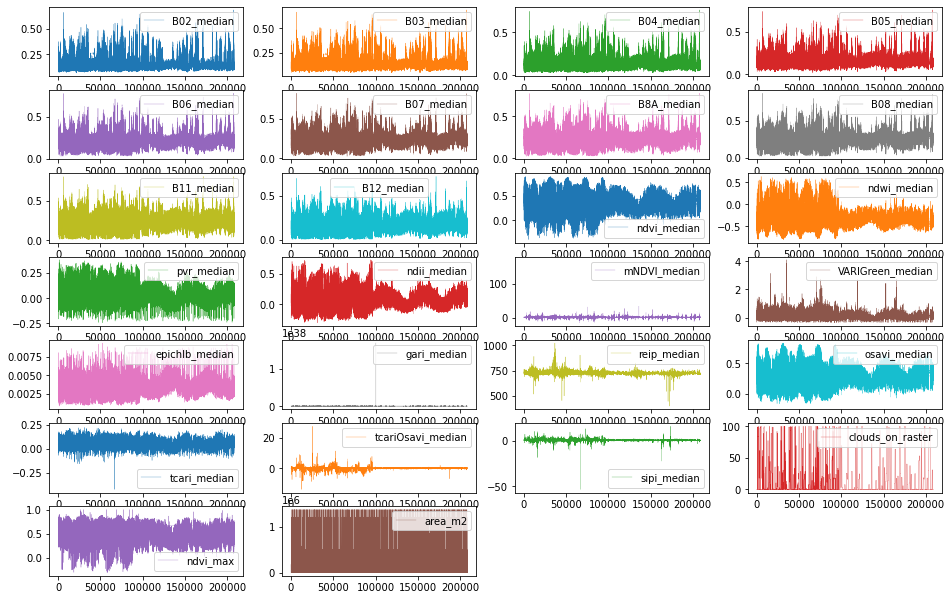

In [16]:
# Facet plots
##tener en cuenta que se grafican los valores para todos los odm_id. 
##Para ver más claro el gráfico habría que elegir un espacio en particular
df_verde_noverde[numerical_columns].plot(subplots=True,
        linewidth=0.3,
        layout=(8,4),
        figsize=(16, 12),
        sharex=False,
        sharey=False)
plt.show()

In [17]:
# Computing Correlation Matrices
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
######
corr_p = df_verde_noverde[numerical_columns].corr(method='pearson')
#print('Pearson correlation matrix')
#print(corr_p)
#####
corr_s = df_verde_noverde[numerical_columns].corr(method='spearman')
#print('Spearman correlation matrix')
#print(corr_s)

<AxesSubplot:>

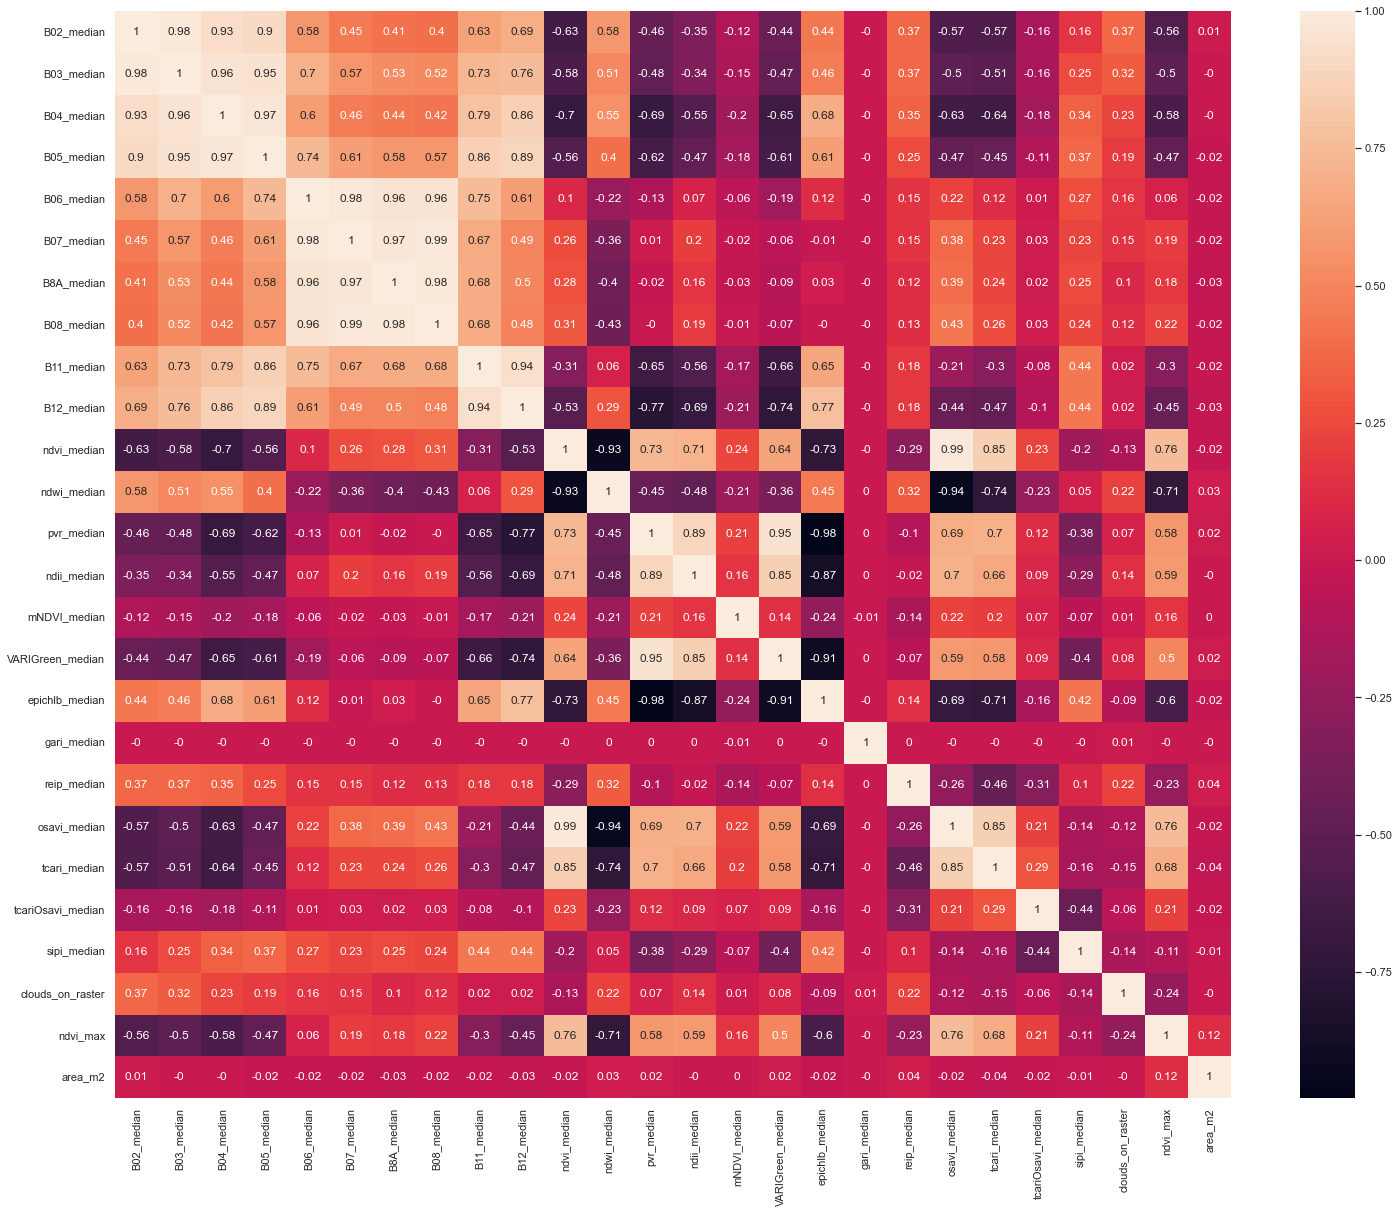

In [18]:
##se analiza la correlación de las variables 
sns.set(rc = {'figure.figsize':(25,20)})
correlation_matrix=df_verde_noverde[numerical_columns].corr(method='pearson').round(2)
sns.heatmap(data=correlation_matrix, annot=True)

<AxesSubplot:>

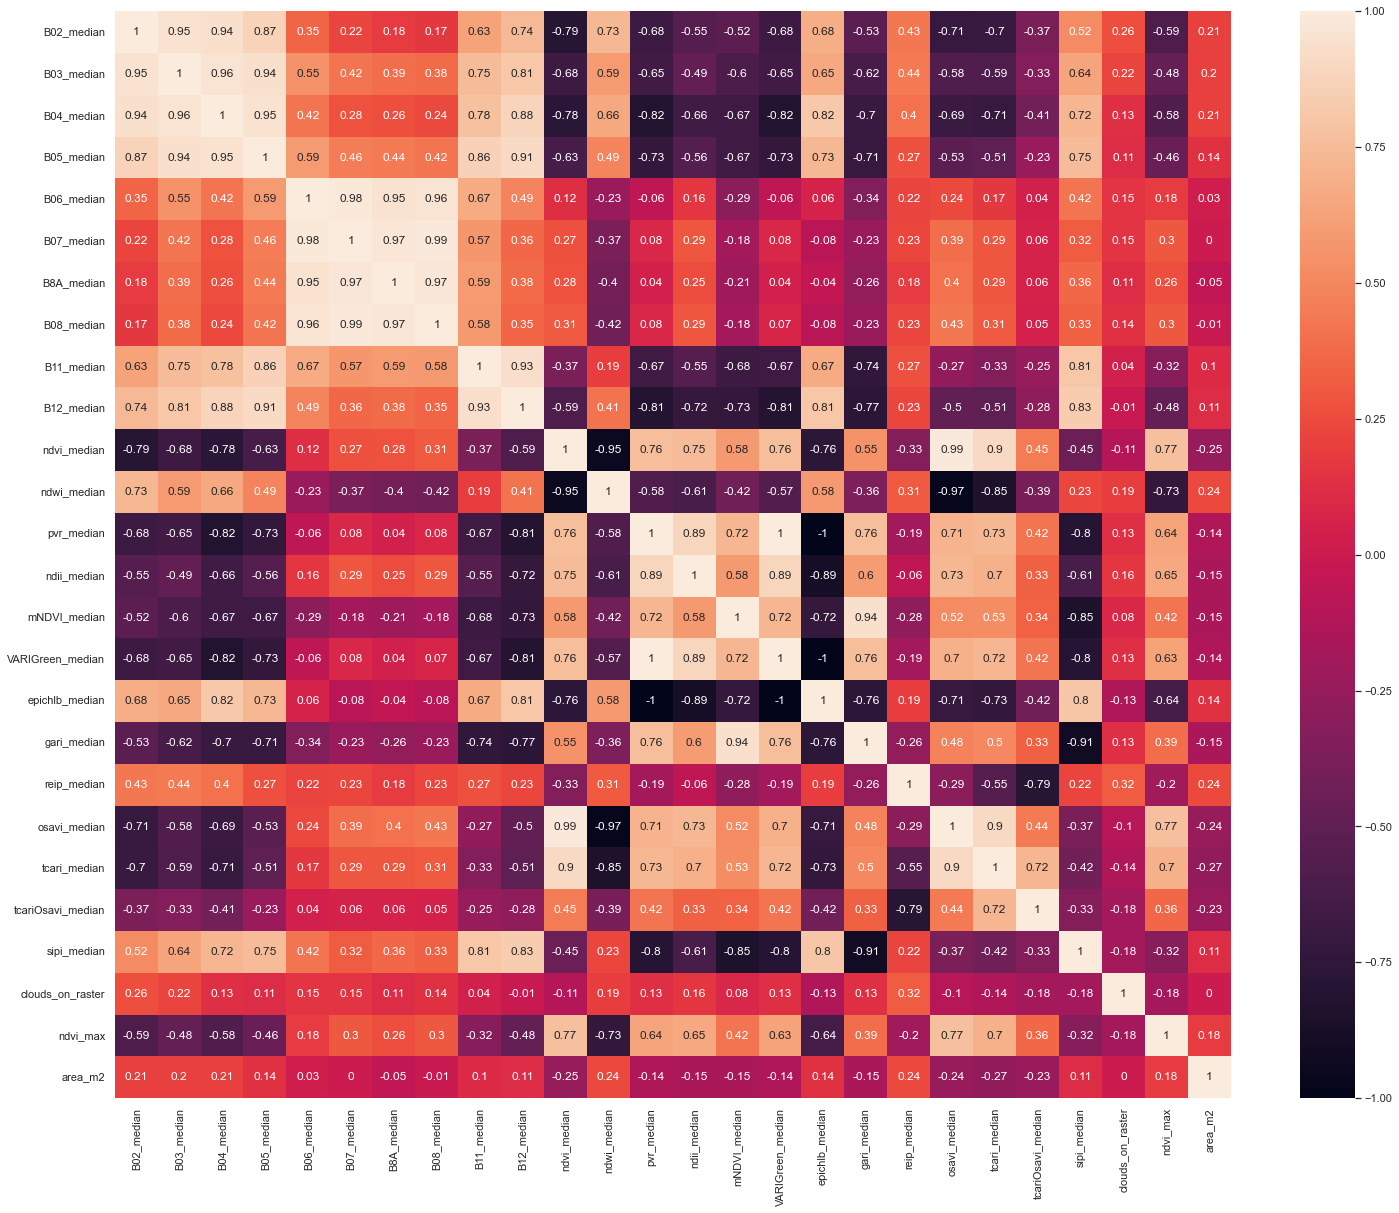

In [19]:
##se analiza la correlación de las variables 
sns.set(rc = {'figure.figsize':(25,20)})
correlation_matrix=df_verde_noverde[numerical_columns].corr(method='spearman').round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [20]:
####se quitan aquellas variables con correlaciones mayores a 0.85 en términos absolutos
cor_matrix = df_verde_noverde[numerical_columns].corr().abs()
#print(cor_matrix)
#################
##Se analiza las correlaciones por encima de la diagnoal principal ya que la matriz de correlaciones es simétrica###############
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
#print(upper_tri)
###############
##se arma un listado de las variables con correlación mayor a 0,85.
##############
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]
to_drop
################
##se quitan las variables con mayor correlación
############
df_verde_noverde = df_verde_noverde.drop(to_drop, axis=1)

In [21]:
###se descarta la variable area_m2 ya que en  espacios no verdes asume el mismo valor para todos los objetos
df_verde_noverde = df_verde_noverde.drop('area_m2', axis=1)
##se elimina gari_median
df_verde_noverde = df_verde_noverde.drop('gari_median', axis=1)

<AxesSubplot:>

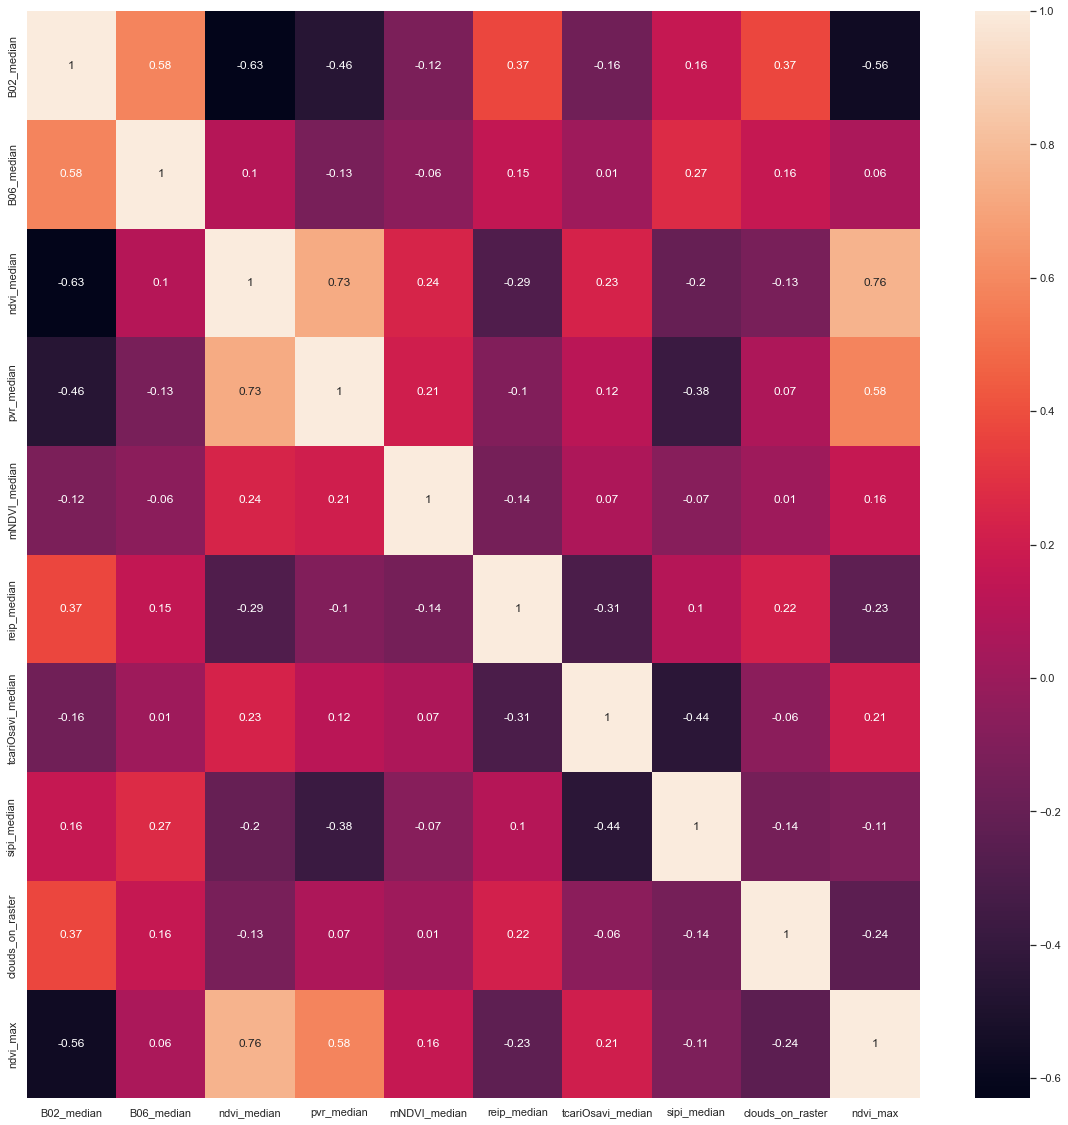

In [22]:
sns.set(rc = {'figure.figsize':(20,20)})
correlation_matrix=df_verde_noverde.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [23]:
# de nuevo se agrupan las variables en categóricas y numéricas ya que cambió la cantidad de variables
############
categorical_columns=[]
numerical_columns=[]
for i in df_verde_noverde.columns:
    if df_verde_noverde[i].dtype=='object':
        categorical_columns.append(i)
    elif df_verde_noverde[i].dtype in ['int64','float64']:
        numerical_columns.append(i)
################        
print(categorical_columns)
print(numerical_columns)
################

['osm_id', 'verde']
['B02_median', 'B06_median', 'ndvi_median', 'pvr_median', 'mNDVI_median', 'reip_median', 'tcariOsavi_median', 'sipi_median', 'clouds_on_raster', 'ndvi_max']


In [24]:
###genero una nueva variable que identifica cada espacio dado que la etiqueta osm_id tiene el caracter "-" y a veces eso genera error
df_verde_noverde['osm_id2'] = df_verde_noverde['osm_id'].astype(str)
df_verde_noverde['osm_id2'] = LabelEncoder().fit_transform(df_verde_noverde['osm_id2'])
df_verde_noverde.head(n=2)

date     osm_id  B02_median  B06_median  ndvi_median  pvr_median  \
0 2017-01-03  605976736      0.0965      0.1991     0.547001    0.091723   
1 2017-01-03  559322368      0.1066      0.2596     0.534292    0.053555   

   mNDVI_median  reip_median  tcariOsavi_median  sipi_median  \
0      1.301351   722.173889           0.212710     0.884216   
1      1.059602   720.997009           0.240232     0.971875   

   clouds_on_raster  ndvi_max verde  osm_id2  
0               0.0  0.630881     1      866  
1               0.0  0.630041     1      794

In [25]:
###############################
### se genera el train y el test
pd_id=df_verde_noverde.drop_duplicates(subset='osm_id2')
pd_id=pd_id[['osm_id2']]
pd_id.shape

##se generan nros aleatorios para dividir el dataset en training y test (se divide por observacion para conservar la independencia)
np.random.seed(42)
pd_id['wookie'] = (np.random.randint(0, 10000, pd_id.shape[0]))/10000
pd_id=pd_id[['osm_id2', 'wookie']]
pd_id.head(n=2)
##############
pd_id['MODELING_GROUP'] = np.where(((pd_id.wookie <= 0.65)), 'TRAINING', 'TESTING')
pd_id.head(n=5)
###################
tips_summed = pd_id.groupby(['MODELING_GROUP'])['wookie'].count()
tips_summed
##################
pd_id=pd_id.sort_values(by=['osm_id2'], ascending=[True])
pd_id.head(n=3)
pd_id=pd_id[['osm_id2','MODELING_GROUP']]
####################
df_=df_verde_noverde.merge(pd_id, on=['osm_id2'], how='left')
df_.head(n=2)

date     osm_id  B02_median  B06_median  ndvi_median  pvr_median  \
0 2017-01-03  605976736      0.0965      0.1991     0.547001    0.091723   
1 2017-01-03  559322368      0.1066      0.2596     0.534292    0.053555   

   mNDVI_median  reip_median  tcariOsavi_median  sipi_median  \
0      1.301351   722.173889           0.212710     0.884216   
1      1.059602   720.997009           0.240232     0.971875   

   clouds_on_raster  ndvi_max verde  osm_id2 MODELING_GROUP  
0               0.0  0.630881     1      866        TESTING  
1               0.0  0.630041     1      794       TRAINING

In [26]:
df_.columns

Index(['date', 'osm_id', 'B02_median', 'B06_median', 'ndvi_median',
       'pvr_median', 'mNDVI_median', 'reip_median', 'tcariOsavi_median',
       'sipi_median', 'clouds_on_raster', 'ndvi_max', 'verde', 'osm_id2',
       'MODELING_GROUP'],
      dtype='object')

In [27]:
df_['MODELING_GROUP'].value_counts()

TRAINING    199824
TESTING     105708
Name: MODELING_GROUP, dtype: int64

In [28]:
##se genera el train
train=df_[df_['MODELING_GROUP']=='TRAINING']
train.head(n=3)
train.verde.value_counts()

1    133584
0     66240
Name: verde, dtype: int64

In [29]:
##se genera el test
test=df_[df_['MODELING_GROUP']=='TESTING']
test.head(n=3)
test.verde.value_counts()

1    75348
0    30360
Name: verde, dtype: int64

In [81]:
##Normalizamos las variables numéricas
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
####################
#############
##importante
minmax_scale = preprocessing.MinMaxScaler().fit(train[numerical_columns])
####
model = minmax_scale.fit(train[numerical_columns])
train[numerical_columns]=model.transform(train[numerical_columns])
train
################3
###############
model = minmax_scale.fit(test[numerical_columns])
test[numerical_columns]=model.transform(test[numerical_columns])
test.head(n=2)

date     osm_id  B02_median  B06_median  ndvi_median  pvr_median  \
0 2017-01-03  605976736    0.053152    0.206668     0.687840    0.510012   
9 2017-01-03  567533717    0.100958    0.275986     0.583211    0.415051   

   mNDVI_median  reip_median  tcariOsavi_median  sipi_median  \
0      0.090731     0.642944           0.505393     0.598736   
9      0.089322     0.647178           0.496664     0.601296   

   clouds_on_raster  ndvi_max verde  osm_id2 MODELING_GROUP  
0               0.0  0.691311     1      866        TESTING  
9               0.0  0.577605     1      803        TESTING

In [82]:
#test_=test[['date','osm_id','osm_id2','verde','ndvi_median', 'pvr_median', 'epichlb_median', 'osavi_median',
      # 'clouds_on_raster', 'ndvi_max']]
#test_

In [83]:
train_=train
test_=test

In [84]:
train_.verde.value_counts()

1    133584
0     66240
Name: verde, dtype: int64

In [85]:
test_.verde.value_counts()

1    75348
0    30360
Name: verde, dtype: int64

In [86]:
#from pathlib import Path  
#filepath = Path('C:/Users/Varios/Desktop/Diplodatos/verde_noverde.csv') 
#filepath.parent.mkdir(parents=True, exist_ok=True)  
#df_.to_csv(filepath) 

<AxesSubplot:>

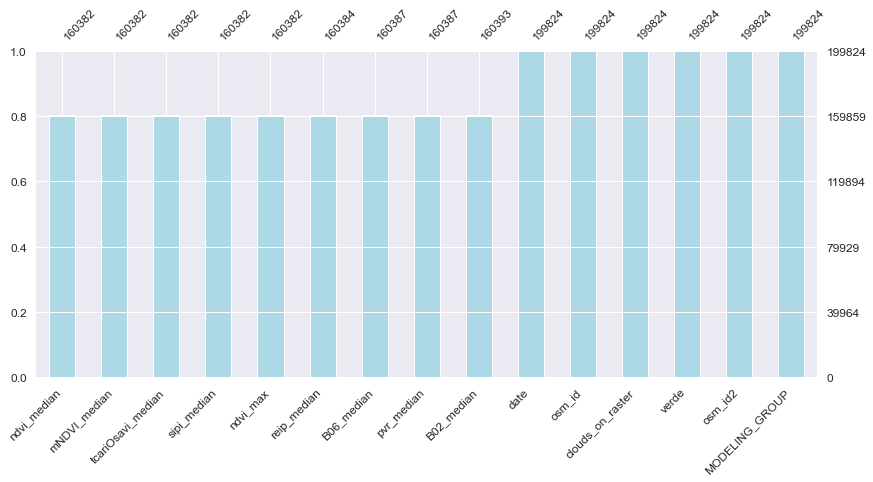

In [87]:
### se pasa a formato fecha a la variable date
train_['date'] = pd.to_datetime(train_['date'])
train_=train_.sort_values(by=['osm_id2','date'], ascending=[True,True])
import missingno as msno
msno.bar(train_,figsize=(14, 6), sort="ascending",fontsize=12, color='lightblue')

In [88]:
train_.columns

Index(['date', 'osm_id', 'B02_median', 'B06_median', 'ndvi_median',
       'pvr_median', 'mNDVI_median', 'reip_median', 'tcariOsavi_median',
       'sipi_median', 'clouds_on_raster', 'ndvi_max', 'verde', 'osm_id2',
       'MODELING_GROUP'],
      dtype='object')

<AxesSubplot:>

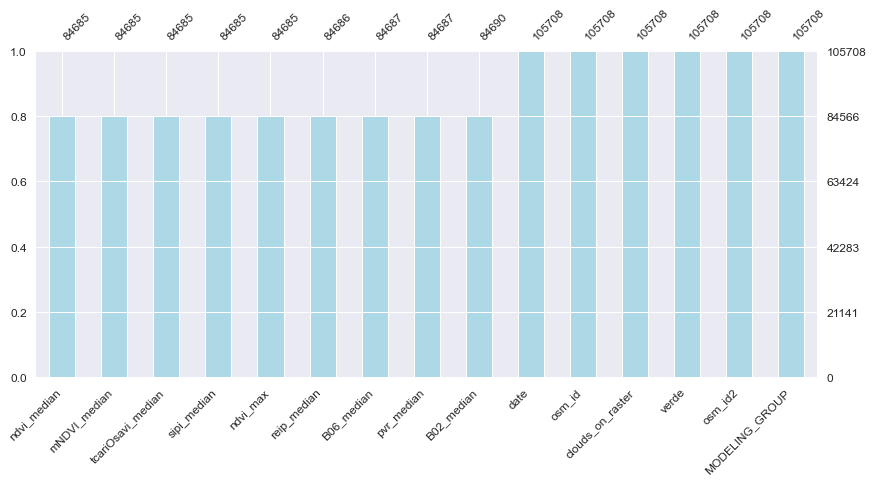

In [89]:
### formato fecha a la variable date
test_['date'] = pd.to_datetime(test_['date'])
test_=test_.sort_values(by=['osm_id2','date'], ascending=[True,True])
#####
msno.bar(test_,figsize=(14, 6), sort="ascending",fontsize=12, color='lightblue')

<AxesSubplot:>

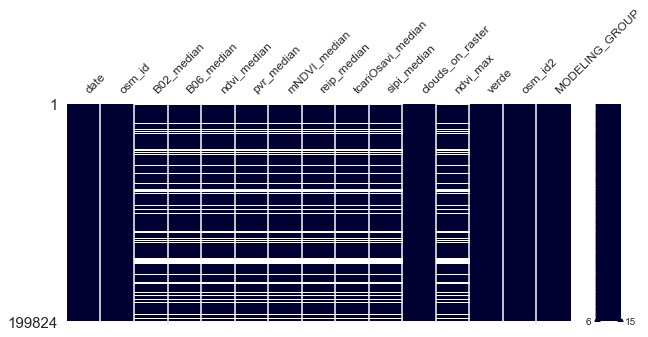

In [90]:
msno.matrix(train_,figsize=(10, 4), fontsize=12, color=[0,0,0.2])

<AxesSubplot:>

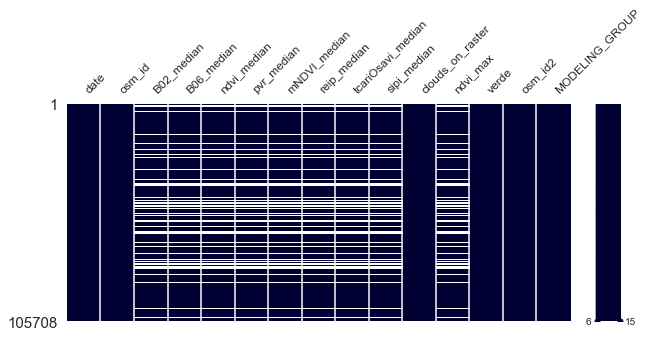

In [91]:
msno.matrix(test_,figsize=(10, 4), fontsize=12, color=[0,0,0.2])

In [92]:
categorical_columns=[]
numerical_columns=[]
for i in train_.columns:
    if train_[i].dtype=='object':
        categorical_columns.append(i)
    elif train_[i].dtype in ['int64','float64']:
        numerical_columns.append(i)
######################
numerical=list(train_[numerical_columns].columns.values)

In [93]:
numerical

['B02_median',
 'B06_median',
 'ndvi_median',
 'pvr_median',
 'mNDVI_median',
 'reip_median',
 'tcariOsavi_median',
 'sipi_median',
 'clouds_on_raster',
 'ndvi_max']

In [94]:
###descartamos las observaciones que tienen NAs en la mayoría de los indicadores. ESto estaría explicado por los días que
##no pasa el satélite por la zona##
train_= train_[~((train_['B02_median'].isnull()==True) &
              (train_['B06_median'].isnull()==True) &
               (train_['ndvi_median'].isnull()==True) &
               (train_['pvr_median'].isnull()==True) &
               (train_['mNDVI_median'].isnull()==True) &
               (train_['reip_median'].isnull()==True) &
               (train_['tcariOsavi_median'].isnull()==True) &
               (train_['sipi_median'].isnull()==True) &
               (train_['ndvi_max'].isnull()==True) 
               )]
train_.shape

(160394, 15)

In [95]:
test_.columns

Index(['date', 'osm_id', 'B02_median', 'B06_median', 'ndvi_median',
       'pvr_median', 'mNDVI_median', 'reip_median', 'tcariOsavi_median',
       'sipi_median', 'clouds_on_raster', 'ndvi_max', 'verde', 'osm_id2',
       'MODELING_GROUP'],
      dtype='object')

In [96]:
###quitamos las observaciones que tienen NAs en la mayoría de los indicadores que estaría explicado por los días que
##no pasa el satélite por la zona##
test_= test_[~((test_['B02_median'].isnull()==True) &
              (test_['B06_median'].isnull()==True) &
               (test_['ndvi_median'].isnull()==True) &
               (test_['pvr_median'].isnull()==True) &
               (test_['mNDVI_median'].isnull()==True) &
               (test_['reip_median'].isnull()==True) &
               (test_['tcariOsavi_median'].isnull()==True) &
               (test_['sipi_median'].isnull()==True) &
               (test_['ndvi_max'].isnull()==True)
              )]
test_.shape

(84691, 15)

In [97]:
categorical_columns=[]
numerical_columns=[]
for i in train_.columns:
    if train_[i].dtype=='object':
        categorical_columns.append(i)
    elif train_[i].dtype in ['int64','float64']:
        numerical_columns.append(i)
######################
numerical=list(train_[numerical_columns].columns.values)

<AxesSubplot:>

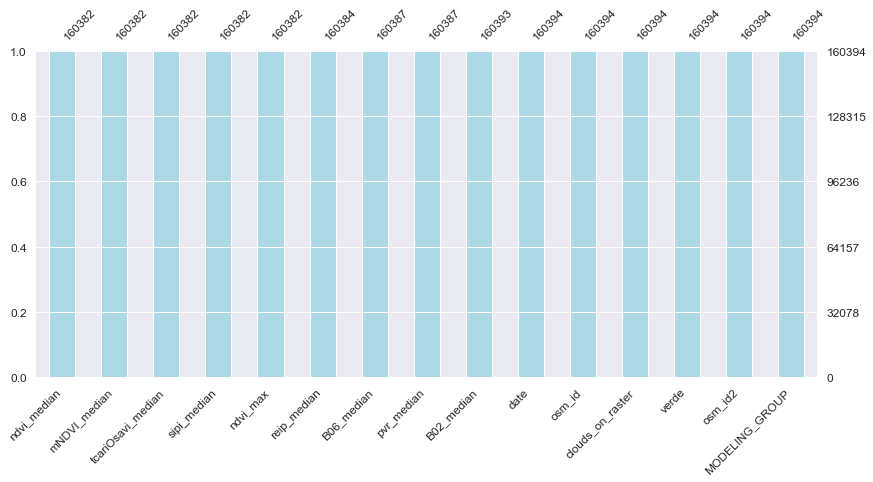

In [98]:
msno.bar(train_,figsize=(14, 6), sort="ascending",fontsize=12, color='lightblue')

<AxesSubplot:>

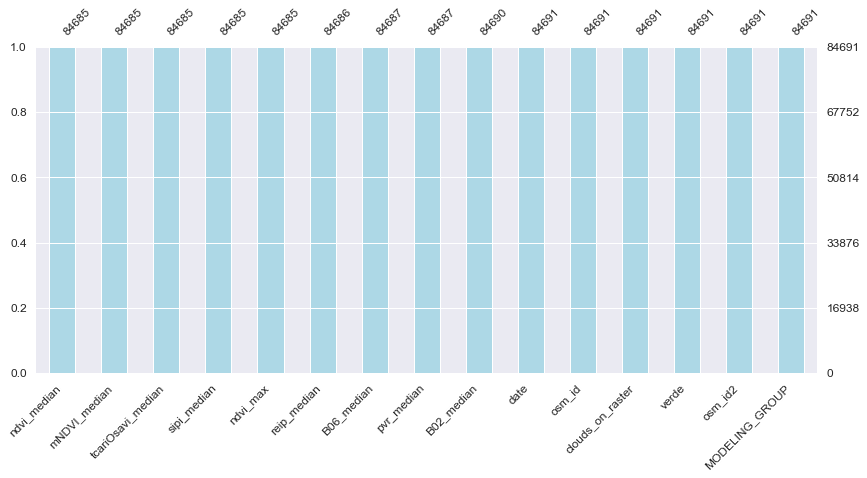

In [99]:
msno.bar(test_,figsize=(14, 6), sort="ascending",fontsize=12, color='lightblue')

<AxesSubplot:>

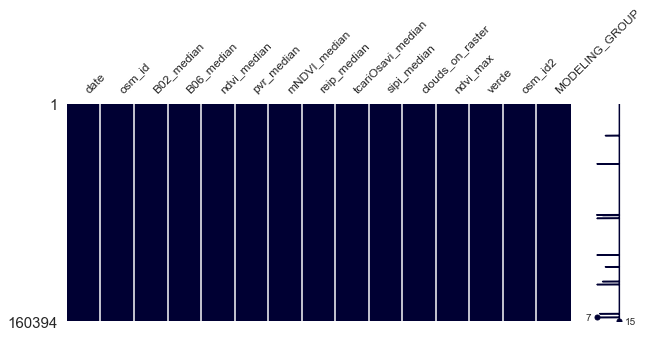

In [100]:
msno.matrix(train_,figsize=(10, 4), fontsize=12, color=[0,0,0.2])

<AxesSubplot:>

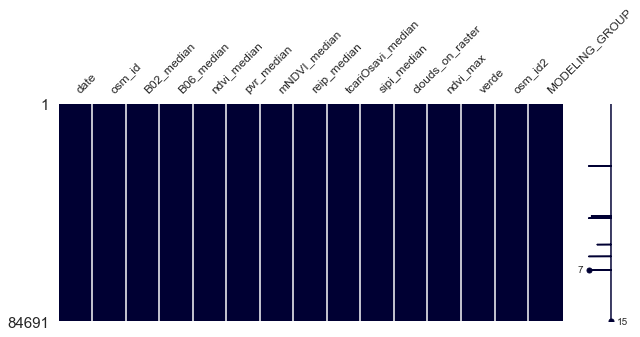

In [101]:
msno.matrix(test_,figsize=(10, 4), fontsize=12, color=[0,0,0.2])

In [102]:
numerical_columns

['B02_median',
 'B06_median',
 'ndvi_median',
 'pvr_median',
 'mNDVI_median',
 'reip_median',
 'tcariOsavi_median',
 'sipi_median',
 'clouds_on_raster',
 'ndvi_max']

In [103]:
###Para imputar los NAs restantes se prueba con el método de interpolación lineal
######################################
col_list=numerical_columns
####################################
##train
for col in col_list:
              namer=col+'_linear_imputed'
              train_[namer]= train_[col].interpolate(method='linear')
##test
for col in col_list:
              namer=col+'_linear_imputed'
              test_[namer]= test_[col].interpolate(method='linear')
test_.head(n=3)

date   osm_id  B02_median  B06_median  ndvi_median  pvr_median  \
209247 2017-01-03  100-nev    0.114445    0.261011     0.498360    0.269295   
210017 2017-02-12  100-nev    0.091301    0.232281     0.533931    0.325253   
210363 2017-02-22  100-nev    0.099122    0.233772     0.513768    0.307883   

        mNDVI_median  reip_median  tcariOsavi_median  sipi_median  ...  \
209247      0.088346     0.650975           0.455213     0.603980  ...   
210017      0.089129     0.643852           0.484987     0.601745  ...   
210363      0.088765     0.650322           0.466062     0.602699  ...   

        B02_median_linear_imputed  B06_median_linear_imputed  \
209247                   0.114445                   0.261011   
210017                   0.091301                   0.232281   
210363                   0.099122                   0.233772   

       ndvi_median_linear_imputed  pvr_median_linear_imputed  \
209247                   0.498360                   0.269295   
210017                   0.533931                   0.325253   
210363                   0.513768                   0.307883   

       mNDVI_median_linear_imputed  reip_median_linear_imputed  \
209247                    0.088346                    0.650975   
210017                    0.089129                    0.643852   
210363                    0.088765                    0.650322   

        tcariOsavi_median_linear_imputed  sipi_median_linear_imputed  \
209247                          0.455213                    0.603980   
210017                          0.484987                    0.601745   
210363                          0.466062                    0.602699   

        clouds_on_raster_linear_imputed  ndvi_max_linear_imputed  
209247                              0.0                 0.692483  
210017                              0.0                 0.664315  
210363                              0.0                 0.689868  

[3 rows x 25 columns]

In [104]:
###el train y test siguen siendo desbalanceados en términos de clase

In [105]:
train_['verde'].value_counts()

1    107041
0     53353
Name: verde, dtype: int64

In [106]:
test_['verde'].value_counts()

1    60230
0    24461
Name: verde, dtype: int64

In [107]:
train_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160394 entries, 209169 to 305494
Data columns (total 25 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   date                              160394 non-null  datetime64[ns]
 1   osm_id                            160394 non-null  object        
 2   B02_median                        160393 non-null  float64       
 3   B06_median                        160387 non-null  float64       
 4   ndvi_median                       160382 non-null  float64       
 5   pvr_median                        160387 non-null  float64       
 6   mNDVI_median                      160382 non-null  float64       
 7   reip_median                       160384 non-null  float64       
 8   tcariOsavi_median                 160382 non-null  float64       
 9   sipi_median                       160382 non-null  float64       
 10  clouds_on_raster           

In [108]:
##se descartan variables originales que fueron imputadas para no tender NAs
train_=train_.drop(['B02_median','B06_median',  
'ndvi_median',                  
'pvr_median',                       
'mNDVI_median',                      
'reip_median',                    
'tcariOsavi_median',                    
'sipi_median',  
'clouds_on_raster','ndvi_max'],axis=1)  

In [109]:
test_=test_.drop(['B02_median','B06_median',  
'ndvi_median',                  
'pvr_median',                       
'mNDVI_median',                      
'reip_median',                    
'tcariOsavi_median',                    
'sipi_median',  
'clouds_on_raster','ndvi_max'],axis=1)

In [110]:
categorical_columns=[]
numerical_columns=[]
for i in train_.columns:
    if train_[i].dtype=='object':
        categorical_columns.append(i)
    elif train_[i].dtype in ['int64','float64']:
        numerical_columns.append(i)
######################
numerical=list(train_[numerical_columns].columns.values)

In [111]:
##replico nuevamente osm_id22 así la tengo como variable para graficar 
train_['osm_id22']=train_['osm_id2']
test_['osm_id22']=test_['osm_id2']

In [112]:
train_.shape

(160394, 16)

In [113]:
##ventana temporal utilizada -se prueba por ejemplo una ventana temporal de 14 días-
feature_window=14

In [114]:
train_['date1']=train_['date']
test_['date1']=test_['date']
train_['date1'] = pd.to_datetime(train_['date1'])
test_['date1'] = pd.to_datetime(test_['date1'])

In [115]:
##Buffer each entity train
####################################################################################################################
###Se crea una nueva variable llamada  “flipper”  que indica cuando cambia el osm_id previo ordenar el dataset por fecha y osm_id
train_['flipper'] = np.where((train_.osm_id2 != train_.osm_id2.shift(1)), 1, 0)
train_.head()
##########################################################################################################
##Se calculan el nro de d{ias desde que el espacio aparece en la base:  “TIME_SINCE_START” 
## la variable "too_soon.” toma el valor 1 si hay menos de los días definidos en "feature window".
##We will use these new variables to create a running mean, median, max, and min.
#Select the first record of each machine
starter=train_[train_['flipper'] == 1]
starter=starter[['date','osm_id2']]
#rename date to start_date
starter=starter.rename(index=str, columns={"date": "START_DATE"})
#convert START_DATE to date
starter['START_DATE'] = pd.to_datetime(starter['START_DATE'])
#Merge START_DATE to the original data set
train_=train_.sort_values(by=['osm_id2', 'date'], ascending=[True, True])
starter=starter.sort_values(by=['osm_id2'], ascending=[True])
train_ =train_.merge(starter, on=['osm_id2'], how='left')
# calculate the number of days since the beginning of each well. 
train_['C'] = train_['date'] - train_['START_DATE']
train_['TIME_SINCE_START'] = train_['C'] / np.timedelta64(1, 'D')
train_=train_.drop(columns=['C'])
train_['too_soon'] = np.where((train_.TIME_SINCE_START < feature_window) , 1, 0)
###############################################################################################

In [116]:
##Buffer each entity test
####################################################################################################################
test_['flipper'] = np.where((test_.osm_id2 != test_.osm_id2.shift(1)), 1, 0)
test_.head()
##########################################################################################################
#Select the first record of each machine
starter=test_[test_['flipper'] == 1]
starter=starter[['date','osm_id2']]
#rename date to start_date
starter=starter.rename(index=str, columns={"date": "START_DATE"})
#convert START_DATE to date
starter['START_DATE'] = pd.to_datetime(starter['START_DATE'])
#Merge START_DATE to the original data set
test_=test_.sort_values(by=['osm_id2', 'date'], ascending=[True, True])
starter=starter.sort_values(by=['osm_id2'], ascending=[True])
test_ =test_.merge(starter, on=['osm_id2'], how='left')
# calculate the number of days since the beginning of each well. 
test_['C'] = test_['date'] - test_['START_DATE']
test_['TIME_SINCE_START'] = test_['C'] / np.timedelta64(1, 'D')
test_=test_.drop(columns=['C'])
test_['too_soon'] = np.where((test_.TIME_SINCE_START < feature_window) , 1, 0)

In [117]:
import pandas as pd
conteotrain=train_['date'].value_counts().rename_axis('date').to_frame('counts')
conteotrain.head(n=2)

counts
date              
2017-01-03     724
2021-07-16     724

In [118]:
conteotest=test_['date'].value_counts().rename_axis('date').to_frame('counts')
conteotest.head(n=2)

counts
date              
2017-01-03     383
2020-07-16     383

In [119]:
train_=train_.merge(conteotrain, on=['date'], how='inner')
train_.head(n=2)

date osm_id verde  osm_id2 MODELING_GROUP  B02_median_linear_imputed  \
0 2017-01-03  0-nev     0        0       TRAINING                   0.236198   
1 2017-01-03  1-nev     0        1       TRAINING                   0.201980   

   B06_median_linear_imputed  ndvi_median_linear_imputed  \
0                   0.336801                    0.457524   
1                   0.332501                    0.461795   

   pvr_median_linear_imputed  mNDVI_median_linear_imputed  ...  \
0                   0.329374                     0.335995  ...   
1                   0.328295                     0.335674  ...   

   sipi_median_linear_imputed  clouds_on_raster_linear_imputed  \
0                    0.814261                              0.0   
1                    0.814984                              0.0   

   ndvi_max_linear_imputed  osm_id22      date1  flipper START_DATE  \
0                 0.640642         0 2017-01-03        1 2017-01-03   
1                 0.668839         1 2017-01-03        1 2017-01-03   

   TIME_SINCE_START too_soon  counts  
0               0.0        1     724  
1               0.0        1     724  

[2 rows x 22 columns]

In [120]:
test_=test_.merge(conteotest, on=['date'], how='inner')
test_.head(n=2)

date   osm_id verde  osm_id2 MODELING_GROUP  \
0 2017-01-03  100-nev     0        3        TESTING   
1 2017-01-03  102-nev     0        6        TESTING   

   B02_median_linear_imputed  B06_median_linear_imputed  \
0                   0.114445                   0.261011   
1                   0.145251                   0.294213   

   ndvi_median_linear_imputed  pvr_median_linear_imputed  \
0                    0.498360                   0.269295   
1                    0.379567                   0.231597   

   mNDVI_median_linear_imputed  ...  sipi_median_linear_imputed  \
0                     0.088346  ...                    0.603980   
1                     0.086720  ...                    0.610758   

   clouds_on_raster_linear_imputed  ndvi_max_linear_imputed  osm_id22  \
0                              0.0                 0.692483         3   
1                              0.0                 0.617828         6   

       date1  flipper START_DATE  TIME_SINCE_START too_soon  counts  
0 2017-01-03        1 2017-01-03               0.0        1     383  
1 2017-01-03        1 2017-01-03               0.0        1     383  

[2 rows x 22 columns]

In [121]:
###se eligen las series de tiempo con igual cantidad de fechas para que corran los modelos
max_train=max(train_['counts'])
max_test=max(test_['counts'])

In [122]:
train_=train_[train_['counts']==max_train]
train_.head(n=2)

date osm_id verde  osm_id2 MODELING_GROUP  B02_median_linear_imputed  \
0 2017-01-03  0-nev     0        0       TRAINING                   0.236198   
1 2017-01-03  1-nev     0        1       TRAINING                   0.201980   

   B06_median_linear_imputed  ndvi_median_linear_imputed  \
0                   0.336801                    0.457524   
1                   0.332501                    0.461795   

   pvr_median_linear_imputed  mNDVI_median_linear_imputed  ...  \
0                   0.329374                     0.335995  ...   
1                   0.328295                     0.335674  ...   

   sipi_median_linear_imputed  clouds_on_raster_linear_imputed  \
0                    0.814261                              0.0   
1                    0.814984                              0.0   

   ndvi_max_linear_imputed  osm_id22      date1  flipper START_DATE  \
0                 0.640642         0 2017-01-03        1 2017-01-03   
1                 0.668839         1 2017-01-03        1 2017-01-03   

   TIME_SINCE_START too_soon  counts  
0               0.0        1     724  
1               0.0        1     724  

[2 rows x 22 columns]

In [123]:
test_=test_[test_['counts']==max_test]
test_.head(n=2)

date   osm_id verde  osm_id2 MODELING_GROUP  \
0 2017-01-03  100-nev     0        3        TESTING   
1 2017-01-03  102-nev     0        6        TESTING   

   B02_median_linear_imputed  B06_median_linear_imputed  \
0                   0.114445                   0.261011   
1                   0.145251                   0.294213   

   ndvi_median_linear_imputed  pvr_median_linear_imputed  \
0                    0.498360                   0.269295   
1                    0.379567                   0.231597   

   mNDVI_median_linear_imputed  ...  sipi_median_linear_imputed  \
0                     0.088346  ...                    0.603980   
1                     0.086720  ...                    0.610758   

   clouds_on_raster_linear_imputed  ndvi_max_linear_imputed  osm_id22  \
0                              0.0                 0.692483         3   
1                              0.0                 0.617828         6   

       date1  flipper START_DATE  TIME_SINCE_START too_soon  counts  
0 2017-01-03        1 2017-01-03               0.0        1     383  
1 2017-01-03        1 2017-01-03               0.0        1     383  

[2 rows x 22 columns]

In [124]:
#from pathlib import Path  
#filepath = Path('C:/Users/Varios/Desktop/Diplodatos/dfx.csv') 
#filepath.parent.mkdir(parents=True, exist_ok=True)  
#dfx.to_csv(filepath) 

In [125]:
import plotly.graph_objs as go
import plotly as plotly

In [126]:
col_list=numerical

In [127]:
###Se crean medias móviles  para un grupo de variables para suavizar las series
##########################################
####Rolling summaries###################
###################################
for col in col_list:
     #for x in range(1, (feature_window+1)):
        #qq=str(x)
        qq=str(feature_window)
        namer=col+'_'+qq+'_'+'Mean'
        train_[namer] = np.where((train_.too_soon == 0),(train_[col].rolling(min_periods=1, window=feature_window).mean()), train_[col])

In [128]:
test_.columns

Index(['date', 'osm_id', 'verde', 'osm_id2', 'MODELING_GROUP',
       'B02_median_linear_imputed', 'B06_median_linear_imputed',
       'ndvi_median_linear_imputed', 'pvr_median_linear_imputed',
       'mNDVI_median_linear_imputed', 'reip_median_linear_imputed',
       'tcariOsavi_median_linear_imputed', 'sipi_median_linear_imputed',
       'clouds_on_raster_linear_imputed', 'ndvi_max_linear_imputed',
       'osm_id22', 'date1', 'flipper', 'START_DATE', 'TIME_SINCE_START',
       'too_soon', 'counts'],
      dtype='object')

In [129]:
for col in col_list:
     #for x in range(1, (feature_window+1)):
        #qq=str(x)
        qq=str(feature_window)
        namer=col+'_'+qq+'_'+'Mean'
        test_[namer] = np.where((test_.too_soon == 0),(test_[col].rolling(min_periods=1, window=feature_window).mean()), test_[col])

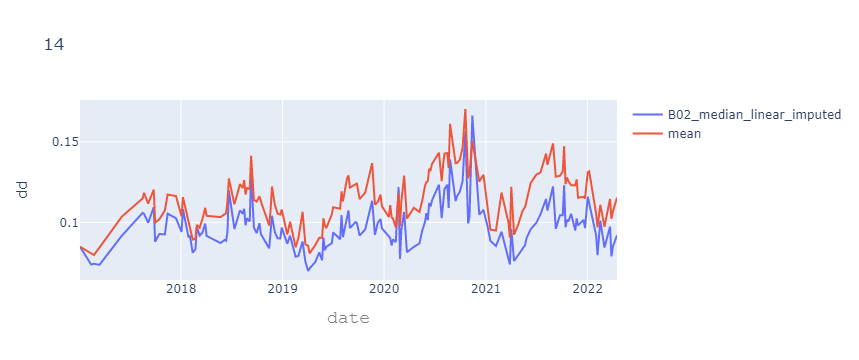

In [132]:
#########################################
#########################################
import plotly.graph_objs as go
import plotly as plotly
import pandas as pd
import numpy as np
#########################################
dd='B02_median_linear_imputed'
####elegir la observación a analizar#####
d=train_[train_['osm_id2']==1106]
###########################
x1=d['date1']
y1=d[dd]
y2=d[dd+'_'+qq+'_Mean']
#######################
trace1 = go.Scatter(
    x=x1,
    y=y1,
    name=dd
)
#######################
trace2 = go.Scatter(
    x=x1,
    y=y2,
    name= 'mean' 
)
#######################
data = [trace1,trace2]
###########################################
layout = go.Layout(
    title=feature_window,
    yaxis=dict(
        title='dd'
    ),
        xaxis=dict(
        title='date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
))
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='shapes-lines')

In [133]:
###Create lags para un grupo de variables
##########################################
####################################
for col in col_list:
        namer=col+'_'+'lag'
        train_[namer] = np.where((train_.too_soon == 0),(train_[col].shift(2)), train_[col])
####################################
###################################
for col in col_list:
        namer=col+'_'+'lag'
        test_[namer] = np.where((test_.too_soon == 0),(test_[col].shift(2)), test_[col])                

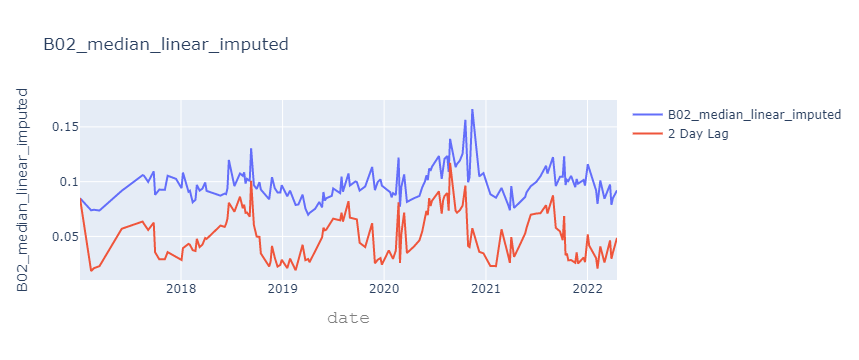

In [134]:
#####################################################
##elijo espacio y variable
d=train_[train_['osm_id2']==1106]
dd='B02_median_linear_imputed'
###elegir la observación a analizar#####
##################################
x1=d['date1']
y1=d[dd]
y2=d[dd+'_lag']
#################
trace1 = go.Scatter(
    x=x1,
    y=y1,
    name=dd
)
##################
trace2 = go.Scatter(
    x=x1,
    y=y2,
    name='2 Day Lag',
)
#################
data = [trace1,trace2]
####################
layout = go.Layout(
    title=dd,
    yaxis=dict(
        title= dd
    ),
    yaxis2=dict(
        title='2 Day Lag',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    ),
        xaxis=dict(
        title='date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
))
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='shapes-lines')

In [135]:
from pathlib import Path  
filepath = Path('C:/Users/Varios/Desktop/Diplodatos/train.csv') 
filepath.parent.mkdir(parents=True, exist_ok=True)  
train.to_csv(filepath) 
###################################
from pathlib import Path  
filepath = Path('C:/Users/Varios/Desktop/Diplodatos/test.csv') 
filepath.parent.mkdir(parents=True, exist_ok=True)  
test.to_csv(filepath) 

In [136]:
numerical

['B02_median_linear_imputed',
 'B06_median_linear_imputed',
 'ndvi_median_linear_imputed',
 'pvr_median_linear_imputed',
 'mNDVI_median_linear_imputed',
 'reip_median_linear_imputed',
 'tcariOsavi_median_linear_imputed',
 'sipi_median_linear_imputed',
 'clouds_on_raster_linear_imputed',
 'ndvi_max_linear_imputed']

In [137]:
###
X_train = train_.drop((['osm_id','osm_id22','date1','verde','flipper','START_DATE','TIME_SINCE_START','counts','too_soon','MODELING_GROUP']),axis=1)
#X_train = X_train.drop(numerical,axis=1)
### como al correr el algoritmo timeseriesrandomforest me indica error por NAS pruebo variables
#X_train=X_train[['osm_id2','date',
 #                'B02_median_linear_imputed','B02_median_lag', 'B02_median_14_Mean',
  #               'B06_median_linear_imputed','B06_median_lag','B06_median_14_Mean',
   #              'sipi_median_linear_imputed','sipi_median_lag','sipi_median_14_Mean',
    #             'pvr_median_linear_imputed','pvr_median_lag','pvr_median_14_Mean',
     #            'tcariOsavi_median_linear_imputed','tcariOsavi_median_lag','tcariOsavi_median_14_Mean',
      #          'clouds_on_raster_linear_imputed','clouds_on_raster_lag','clouds_on_raster_14_Mean'
       #         ]]
X_train.head(n=2)

date  osm_id2  B02_median_linear_imputed  B06_median_linear_imputed  \
0 2017-01-03        0                   0.236198                   0.336801   
1 2017-01-03        1                   0.201980                   0.332501   

   ndvi_median_linear_imputed  pvr_median_linear_imputed  \
0                    0.457524                   0.329374   
1                    0.461795                   0.328295   

   mNDVI_median_linear_imputed  reip_median_linear_imputed  \
0                     0.335995                    0.439965   
1                     0.335674                    0.443046   

   tcariOsavi_median_linear_imputed  sipi_median_linear_imputed  ...  \
0                          0.338545                    0.814261  ...   
1                          0.337009                    0.814984  ...   

   B02_median_linear_imputed_lag  B06_median_linear_imputed_lag  \
0                       0.236198                       0.336801   
1                       0.201980                       0.332501   

   ndvi_median_linear_imputed_lag  pvr_median_linear_imputed_lag  \
0                        0.457524                       0.329374   
1                        0.461795                       0.328295   

   mNDVI_median_linear_imputed_lag  reip_median_linear_imputed_lag  \
0                         0.335995                        0.439965   
1                         0.335674                        0.443046   

   tcariOsavi_median_linear_imputed_lag  sipi_median_linear_imputed_lag  \
0                              0.338545                        0.814261   
1                              0.337009                        0.814984   

   clouds_on_raster_linear_imputed_lag  ndvi_max_linear_imputed_lag  
0                                  0.0                     0.640642  
1                                  0.0                     0.668839  

[2 rows x 32 columns]

In [ ]:
###se quitan este grupo de columnas (son las originales que luego fueron imputadas). 

In [138]:
X_test = test_.drop((['osm_id','osm_id22','date1','verde','flipper','START_DATE','TIME_SINCE_START','counts','too_soon','MODELING_GROUP']),axis=1)
#X_test = X_test.drop(numerical,axis=1)
### como al correr el algoritmo timeseriesrandomforest me indica error por NAS pruebo variables
#X_test=X_test[['osm_id2','date',
 #                'B02_median_linear_imputed','B02_median_lag', 'B02_median_14_Mean',
  #               'B06_median_linear_imputed','B06_median_lag','B06_median_14_Mean',
                 #'sipi_median_linear_imputed','sipi_median_lag','sipi_median_14_Mean',
                 #'pvr_median_linear_imputed','pvr_median_lag','pvr_median_14_Mean',
                 #'tcariOsavi_median_linear_imputed','tcariOsavi_median_lag','tcariOsavi_median_14_Mean',
                 #'clouds_on_raster_linear_imputed','clouds_on_raster_lag','clouds_on_raster_14_Mean'
    #          ]]
X_test.head(n=2)

date  osm_id2  B02_median_linear_imputed  B06_median_linear_imputed  \
0 2017-01-03        3                   0.114445                   0.261011   
1 2017-01-03        6                   0.145251                   0.294213   

   ndvi_median_linear_imputed  pvr_median_linear_imputed  \
0                    0.498360                   0.269295   
1                    0.379567                   0.231597   

   mNDVI_median_linear_imputed  reip_median_linear_imputed  \
0                     0.088346                    0.650975   
1                     0.086720                    0.648003   

   tcariOsavi_median_linear_imputed  sipi_median_linear_imputed  ...  \
0                          0.455213                    0.603980  ...   
1                          0.473340                    0.610758  ...   

   B02_median_linear_imputed_lag  B06_median_linear_imputed_lag  \
0                       0.114445                       0.261011   
1                       0.145251                       0.294213   

   ndvi_median_linear_imputed_lag  pvr_median_linear_imputed_lag  \
0                        0.498360                       0.269295   
1                        0.379567                       0.231597   

   mNDVI_median_linear_imputed_lag  reip_median_linear_imputed_lag  \
0                         0.088346                        0.650975   
1                         0.086720                        0.648003   

   tcariOsavi_median_linear_imputed_lag  sipi_median_linear_imputed_lag  \
0                              0.455213                        0.603980   
1                              0.473340                        0.610758   

   clouds_on_raster_linear_imputed_lag  ndvi_max_linear_imputed_lag  
0                                  0.0                     0.692483  
1                                  0.0                     0.617828  

[2 rows x 32 columns]

In [139]:
X_train= X_train.set_index(['osm_id2','date']) 
X_test= X_test.set_index(['osm_id2','date']) 

In [140]:
X_test.shape

(60514, 30)

In [141]:
X_test.head(n=2)

B02_median_linear_imputed  B06_median_linear_imputed  \
osm_id2 date                                                               
3       2017-01-03                   0.114445                   0.261011   
6       2017-01-03                   0.145251                   0.294213   

                    ndvi_median_linear_imputed  pvr_median_linear_imputed  \
osm_id2 date                                                                
3       2017-01-03                    0.498360                   0.269295   
6       2017-01-03                    0.379567                   0.231597   

                    mNDVI_median_linear_imputed  reip_median_linear_imputed  \
osm_id2 date                                                                  
3       2017-01-03                     0.088346                    0.650975   
6       2017-01-03                     0.086720                    0.648003   

                    tcariOsavi_median_linear_imputed  \
osm_id2 date                                           
3       2017-01-03                          0.455213   
6       2017-01-03                          0.473340   

                    sipi_median_linear_imputed  \
osm_id2 date                                     
3       2017-01-03                    0.603980   
6       2017-01-03                    0.610758   

                    clouds_on_raster_linear_imputed  ndvi_max_linear_imputed  \
osm_id2 date                                                                   
3       2017-01-03                              0.0                 0.692483   
6       2017-01-03                              0.0                 0.617828   

                    ...  B02_median_linear_imputed_lag  \
osm_id2 date        ...                                  
3       2017-01-03  ...                       0.114445   
6       2017-01-03  ...                       0.145251   

                    B06_median_linear_imputed_lag  \
osm_id2 date                                        
3       2017-01-03                       0.261011   
6       2017-01-03                       0.294213   

                    ndvi_median_linear_imputed_lag  \
osm_id2 date                                         
3       2017-01-03                        0.498360   
6       2017-01-03                        0.379567   

                    pvr_median_linear_imputed_lag  \
osm_id2 date                                        
3       2017-01-03                       0.269295   
6       2017-01-03                       0.231597   

                    mNDVI_median_linear_imputed_lag  \
osm_id2 date                                          
3       2017-01-03                         0.088346   
6       2017-01-03                         0.086720   

                    reip_median_linear_imputed_lag  \
osm_id2 date                                         
3       2017-01-03                        0.650975   
6       2017-01-03                        0.648003   

                    tcariOsavi_median_linear_imputed_lag  \
osm_id2 date                                               
3       2017-01-03                              0.455213   
6       2017-01-03                              0.473340   

                    sipi_median_linear_imputed_lag  \
osm_id2 date                                         
3       2017-01-03                        0.603980   
6       2017-01-03                        0.610758   

                    clouds_on_raster_linear_imputed_lag  \
osm_id2 date                                              
3       2017-01-03                                  0.0   
6       2017-01-03                                  0.0   

                    ndvi_max_linear_imputed_lag  
osm_id2 date                                     
3       2017-01-03                     0.692483  
6       2017-01-03                     0.617828  

[2 rows x 30 columns]

In [142]:
X_train.head(n=2)

B02_median_linear_imputed  B06_median_linear_imputed  \
osm_id2 date                                                               
0       2017-01-03                   0.236198                   0.336801   
1       2017-01-03                   0.201980                   0.332501   

                    ndvi_median_linear_imputed  pvr_median_linear_imputed  \
osm_id2 date                                                                
0       2017-01-03                    0.457524                   0.329374   
1       2017-01-03                    0.461795                   0.328295   

                    mNDVI_median_linear_imputed  reip_median_linear_imputed  \
osm_id2 date                                                                  
0       2017-01-03                     0.335995                    0.439965   
1       2017-01-03                     0.335674                    0.443046   

                    tcariOsavi_median_linear_imputed  \
osm_id2 date                                           
0       2017-01-03                          0.338545   
1       2017-01-03                          0.337009   

                    sipi_median_linear_imputed  \
osm_id2 date                                     
0       2017-01-03                    0.814261   
1       2017-01-03                    0.814984   

                    clouds_on_raster_linear_imputed  ndvi_max_linear_imputed  \
osm_id2 date                                                                   
0       2017-01-03                              0.0                 0.640642   
1       2017-01-03                              0.0                 0.668839   

                    ...  B02_median_linear_imputed_lag  \
osm_id2 date        ...                                  
0       2017-01-03  ...                       0.236198   
1       2017-01-03  ...                       0.201980   

                    B06_median_linear_imputed_lag  \
osm_id2 date                                        
0       2017-01-03                       0.336801   
1       2017-01-03                       0.332501   

                    ndvi_median_linear_imputed_lag  \
osm_id2 date                                         
0       2017-01-03                        0.457524   
1       2017-01-03                        0.461795   

                    pvr_median_linear_imputed_lag  \
osm_id2 date                                        
0       2017-01-03                       0.329374   
1       2017-01-03                       0.328295   

                    mNDVI_median_linear_imputed_lag  \
osm_id2 date                                          
0       2017-01-03                         0.335995   
1       2017-01-03                         0.335674   

                    reip_median_linear_imputed_lag  \
osm_id2 date                                         
0       2017-01-03                        0.439965   
1       2017-01-03                        0.443046   

                    tcariOsavi_median_linear_imputed_lag  \
osm_id2 date                                               
0       2017-01-03                              0.338545   
1       2017-01-03                              0.337009   

                    sipi_median_linear_imputed_lag  \
osm_id2 date                                         
0       2017-01-03                        0.814261   
1       2017-01-03                        0.814984   

                    clouds_on_raster_linear_imputed_lag  \
osm_id2 date                                              
0       2017-01-03                                  0.0   
1       2017-01-03                                  0.0   

                    ndvi_max_linear_imputed_lag  
osm_id2 date                                     
0       2017-01-03                     0.640642  
1       2017-01-03                     0.668839  

[2 rows x 30 columns]

<AxesSubplot:>

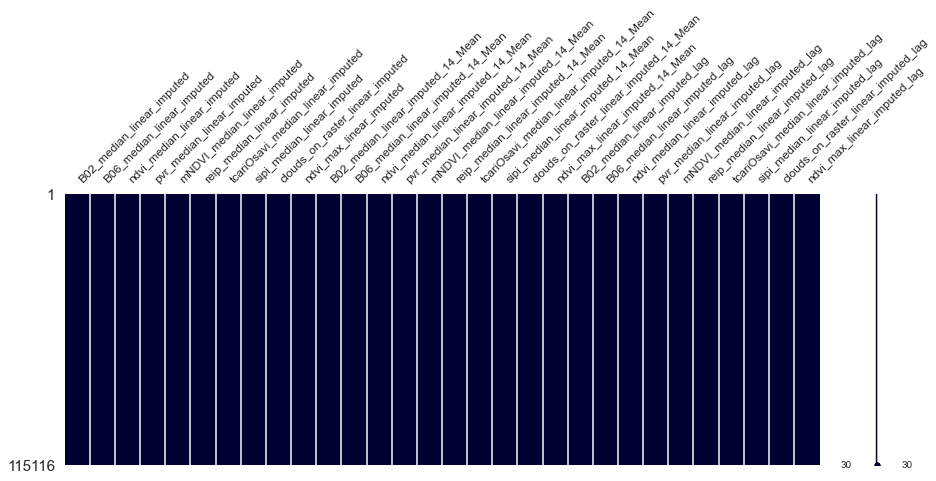

In [143]:
msno.matrix(X_train,figsize=(15, 5), fontsize=12, color=[0,0,0.2])

In [144]:
X_train.isnull().sum(axis = 0)

B02_median_linear_imputed                   0
B06_median_linear_imputed                   0
ndvi_median_linear_imputed                  0
pvr_median_linear_imputed                   0
mNDVI_median_linear_imputed                 0
reip_median_linear_imputed                  0
tcariOsavi_median_linear_imputed            0
sipi_median_linear_imputed                  0
clouds_on_raster_linear_imputed             0
ndvi_max_linear_imputed                     0
B02_median_linear_imputed_14_Mean           0
B06_median_linear_imputed_14_Mean           0
ndvi_median_linear_imputed_14_Mean          0
pvr_median_linear_imputed_14_Mean           0
mNDVI_median_linear_imputed_14_Mean         0
reip_median_linear_imputed_14_Mean          0
tcariOsavi_median_linear_imputed_14_Mean    0
sipi_median_linear_imputed_14_Mean          0
clouds_on_raster_linear_imputed_14_Mean     0
ndvi_max_linear_imputed_14_Mean             0
B02_median_linear_imputed_lag               0
B06_median_linear_imputed_lag     

In [145]:
X_train.shape

(115116, 30)

In [146]:
X_test.isnull().sum(axis = 0)

B02_median_linear_imputed                   0
B06_median_linear_imputed                   0
ndvi_median_linear_imputed                  0
pvr_median_linear_imputed                   0
mNDVI_median_linear_imputed                 0
reip_median_linear_imputed                  0
tcariOsavi_median_linear_imputed            0
sipi_median_linear_imputed                  0
clouds_on_raster_linear_imputed             0
ndvi_max_linear_imputed                     0
B02_median_linear_imputed_14_Mean           0
B06_median_linear_imputed_14_Mean           0
ndvi_median_linear_imputed_14_Mean          0
pvr_median_linear_imputed_14_Mean           0
mNDVI_median_linear_imputed_14_Mean         0
reip_median_linear_imputed_14_Mean          0
tcariOsavi_median_linear_imputed_14_Mean    0
sipi_median_linear_imputed_14_Mean          0
clouds_on_raster_linear_imputed_14_Mean     0
ndvi_max_linear_imputed_14_Mean             0
B02_median_linear_imputed_lag               0
B06_median_linear_imputed_lag     

In [147]:
X_test.shape

(60514, 30)

In [148]:
X_train.head(n=2)

B02_median_linear_imputed  B06_median_linear_imputed  \
osm_id2 date                                                               
0       2017-01-03                   0.236198                   0.336801   
1       2017-01-03                   0.201980                   0.332501   

                    ndvi_median_linear_imputed  pvr_median_linear_imputed  \
osm_id2 date                                                                
0       2017-01-03                    0.457524                   0.329374   
1       2017-01-03                    0.461795                   0.328295   

                    mNDVI_median_linear_imputed  reip_median_linear_imputed  \
osm_id2 date                                                                  
0       2017-01-03                     0.335995                    0.439965   
1       2017-01-03                     0.335674                    0.443046   

                    tcariOsavi_median_linear_imputed  \
osm_id2 date                                           
0       2017-01-03                          0.338545   
1       2017-01-03                          0.337009   

                    sipi_median_linear_imputed  \
osm_id2 date                                     
0       2017-01-03                    0.814261   
1       2017-01-03                    0.814984   

                    clouds_on_raster_linear_imputed  ndvi_max_linear_imputed  \
osm_id2 date                                                                   
0       2017-01-03                              0.0                 0.640642   
1       2017-01-03                              0.0                 0.668839   

                    ...  B02_median_linear_imputed_lag  \
osm_id2 date        ...                                  
0       2017-01-03  ...                       0.236198   
1       2017-01-03  ...                       0.201980   

                    B06_median_linear_imputed_lag  \
osm_id2 date                                        
0       2017-01-03                       0.336801   
1       2017-01-03                       0.332501   

                    ndvi_median_linear_imputed_lag  \
osm_id2 date                                         
0       2017-01-03                        0.457524   
1       2017-01-03                        0.461795   

                    pvr_median_linear_imputed_lag  \
osm_id2 date                                        
0       2017-01-03                       0.329374   
1       2017-01-03                       0.328295   

                    mNDVI_median_linear_imputed_lag  \
osm_id2 date                                          
0       2017-01-03                         0.335995   
1       2017-01-03                         0.335674   

                    reip_median_linear_imputed_lag  \
osm_id2 date                                         
0       2017-01-03                        0.439965   
1       2017-01-03                        0.443046   

                    tcariOsavi_median_linear_imputed_lag  \
osm_id2 date                                               
0       2017-01-03                              0.338545   
1       2017-01-03                              0.337009   

                    sipi_median_linear_imputed_lag  \
osm_id2 date                                         
0       2017-01-03                        0.814261   
1       2017-01-03                        0.814984   

                    clouds_on_raster_linear_imputed_lag  \
osm_id2 date                                              
0       2017-01-03                                  0.0   
1       2017-01-03                                  0.0   

                    ndvi_max_linear_imputed_lag  
osm_id2 date                                     
0       2017-01-03                     0.640642  
1       2017-01-03                     0.668839  

[2 rows x 30 columns]

In [149]:
X_train.columns

Index(['B02_median_linear_imputed', 'B06_median_linear_imputed',
       'ndvi_median_linear_imputed', 'pvr_median_linear_imputed',
       'mNDVI_median_linear_imputed', 'reip_median_linear_imputed',
       'tcariOsavi_median_linear_imputed', 'sipi_median_linear_imputed',
       'clouds_on_raster_linear_imputed', 'ndvi_max_linear_imputed',
       'B02_median_linear_imputed_14_Mean',
       'B06_median_linear_imputed_14_Mean',
       'ndvi_median_linear_imputed_14_Mean',
       'pvr_median_linear_imputed_14_Mean',
       'mNDVI_median_linear_imputed_14_Mean',
       'reip_median_linear_imputed_14_Mean',
       'tcariOsavi_median_linear_imputed_14_Mean',
       'sipi_median_linear_imputed_14_Mean',
       'clouds_on_raster_linear_imputed_14_Mean',
       'ndvi_max_linear_imputed_14_Mean', 'B02_median_linear_imputed_lag',
       'B06_median_linear_imputed_lag', 'ndvi_median_linear_imputed_lag',
       'pvr_median_linear_imputed_lag', 'mNDVI_median_linear_imputed_lag',
       'reip_median_l

In [150]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 115116 entries, (0, Timestamp('2017-01-03 00:00:00')) to (1106, Timestamp('2022-04-17 00:00:00'))
Data columns (total 30 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   B02_median_linear_imputed                 115116 non-null  float64
 1   B06_median_linear_imputed                 115116 non-null  float64
 2   ndvi_median_linear_imputed                115116 non-null  float64
 3   pvr_median_linear_imputed                 115116 non-null  float64
 4   mNDVI_median_linear_imputed               115116 non-null  float64
 5   reip_median_linear_imputed                115116 non-null  float64
 6   tcariOsavi_median_linear_imputed          115116 non-null  float64
 7   sipi_median_linear_imputed                115116 non-null  float64
 8   clouds_on_raster_linear_imputed           115116 non-null  float64
 9   ndvi_max_linear_impute

In [151]:
from sklearn.pipeline import Pipeline
#from sktime.classification.shapelet_based import MrSEQLClassifier

In [152]:
## se cambia el formato del dataset para utilizar los algoritmos de sktime
from sktime.datatypes._panel._convert import (
   from_multi_index_to_nested,
  from_nested_to_multi_index,
)

In [153]:
from sktime.datatypes._panel._convert import (
    from_3d_numpy_to_nested,
    from_multi_index_to_3d_numpy,
    from_nested_to_3d_numpy,
)

In [154]:
X_train.head(n=2)

B02_median_linear_imputed  B06_median_linear_imputed  \
osm_id2 date                                                               
0       2017-01-03                   0.236198                   0.336801   
1       2017-01-03                   0.201980                   0.332501   

                    ndvi_median_linear_imputed  pvr_median_linear_imputed  \
osm_id2 date                                                                
0       2017-01-03                    0.457524                   0.329374   
1       2017-01-03                    0.461795                   0.328295   

                    mNDVI_median_linear_imputed  reip_median_linear_imputed  \
osm_id2 date                                                                  
0       2017-01-03                     0.335995                    0.439965   
1       2017-01-03                     0.335674                    0.443046   

                    tcariOsavi_median_linear_imputed  \
osm_id2 date                                           
0       2017-01-03                          0.338545   
1       2017-01-03                          0.337009   

                    sipi_median_linear_imputed  \
osm_id2 date                                     
0       2017-01-03                    0.814261   
1       2017-01-03                    0.814984   

                    clouds_on_raster_linear_imputed  ndvi_max_linear_imputed  \
osm_id2 date                                                                   
0       2017-01-03                              0.0                 0.640642   
1       2017-01-03                              0.0                 0.668839   

                    ...  B02_median_linear_imputed_lag  \
osm_id2 date        ...                                  
0       2017-01-03  ...                       0.236198   
1       2017-01-03  ...                       0.201980   

                    B06_median_linear_imputed_lag  \
osm_id2 date                                        
0       2017-01-03                       0.336801   
1       2017-01-03                       0.332501   

                    ndvi_median_linear_imputed_lag  \
osm_id2 date                                         
0       2017-01-03                        0.457524   
1       2017-01-03                        0.461795   

                    pvr_median_linear_imputed_lag  \
osm_id2 date                                        
0       2017-01-03                       0.329374   
1       2017-01-03                       0.328295   

                    mNDVI_median_linear_imputed_lag  \
osm_id2 date                                          
0       2017-01-03                         0.335995   
1       2017-01-03                         0.335674   

                    reip_median_linear_imputed_lag  \
osm_id2 date                                         
0       2017-01-03                        0.439965   
1       2017-01-03                        0.443046   

                    tcariOsavi_median_linear_imputed_lag  \
osm_id2 date                                               
0       2017-01-03                              0.338545   
1       2017-01-03                              0.337009   

                    sipi_median_linear_imputed_lag  \
osm_id2 date                                         
0       2017-01-03                        0.814261   
1       2017-01-03                        0.814984   

                    clouds_on_raster_linear_imputed_lag  \
osm_id2 date                                              
0       2017-01-03                                  0.0   
1       2017-01-03                                  0.0   

                    ndvi_max_linear_imputed_lag  
osm_id2 date                                     
0       2017-01-03                     0.640642  
1       2017-01-03                     0.668839  

[2 rows x 30 columns]

In [155]:
X_test.head(n=2)
X_test.shape

(60514, 30)

In [156]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 60514 entries, (3, Timestamp('2017-01-03 00:00:00')) to (1105, Timestamp('2022-04-17 00:00:00'))
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   B02_median_linear_imputed                 60514 non-null  float64
 1   B06_median_linear_imputed                 60514 non-null  float64
 2   ndvi_median_linear_imputed                60514 non-null  float64
 3   pvr_median_linear_imputed                 60514 non-null  float64
 4   mNDVI_median_linear_imputed               60514 non-null  float64
 5   reip_median_linear_imputed                60514 non-null  float64
 6   tcariOsavi_median_linear_imputed          60514 non-null  float64
 7   sipi_median_linear_imputed                60514 non-null  float64
 8   clouds_on_raster_linear_imputed           60514 non-null  float64
 9   ndvi_max_linear_imputed           

In [157]:
X_train.describe()

B02_median_linear_imputed  B06_median_linear_imputed  \
count              115116.000000              115116.000000   
mean                    0.111134                   0.257844   
std                     0.039733                   0.050889   
min                     0.010240                   0.000000   
25%                     0.082857                   0.224858   
50%                     0.105726                   0.259190   
75%                     0.133970                   0.291580   
max                     0.533578                   0.643501   

       ndvi_median_linear_imputed  pvr_median_linear_imputed  \
count               115116.000000              115116.000000   
mean                     0.582278                   0.395807   
std                      0.113275                   0.110701   
min                      0.000000                   0.000000   
25%                      0.492254                   0.319052   
50%                      0.568947                   0.373501   
75%                      0.668549                   0.464239   
max                      1.000000                   1.000000   

       mNDVI_median_linear_imputed  reip_median_linear_imputed  \
count                115116.000000               115116.000000   
mean                      0.342808                    0.425918   
std                       0.008485                    0.010439   
min                       0.077923                    0.000000   
25%                       0.338314                    0.421180   
50%                       0.342700                    0.425326   
75%                       0.346527                    0.429688   
max                       0.607368                    1.000000   

       tcariOsavi_median_linear_imputed  sipi_median_linear_imputed  \
count                     115116.000000               115116.000000   
mean                           0.338070                    0.812504   
std                            0.005092                    0.003803   
min                            0.123804                    0.663453   
25%                            0.337433                    0.810945   
50%                            0.338372                    0.811979   
75%                            0.339132                    0.813639   
max                            1.000000                    1.000000   

       clouds_on_raster_linear_imputed  ndvi_max_linear_imputed  ...  \
count                    115116.000000            115116.000000  ...   
mean                          0.000202                 0.642392  ...   
std                           0.000983                 0.099100  ...   
min                           0.000000                 0.000000  ...   
25%                           0.000000                 0.574871  ...   
50%                           0.000000                 0.649281  ...   
75%                           0.000000                 0.716908  ...   
max                           0.009499                 1.000000  ...   

       B02_median_linear_imputed_lag  B06_median_linear_imputed_lag  \
count                  115116.000000                  115116.000000   
mean                        0.111134                       0.257844   
std                         0.039733                       0.050890   
min                         0.010240                       0.000000   
25%                         0.082857                       0.224858   
50%                         0.105726                       0.259190   
75%                         0.133970                       0.291580   
max                         0.533578                       0.643501   

       ndvi_median_linear_imputed_lag  pvr_median_linear_imputed_lag  \
count                   115116.000000                  115116.000000   
mean                         0.582279                       0.395808   
std                          0.113276                       0.110702   
min                          0.000000             

In [158]:
X_test.describe()

B02_median_linear_imputed  B06_median_linear_imputed  \
count               60514.000000               60514.000000   
mean                    0.101724                   0.226923   
std                     0.034276                   0.045859   
min                     0.009896                   0.004743   
25%                     0.077175                   0.194877   
50%                     0.098404                   0.227538   
75%                     0.122267                   0.257555   
max                     0.674701                   0.753964   

       ndvi_median_linear_imputed  pvr_median_linear_imputed  \
count                60514.000000               60514.000000   
mean                     0.515499                   0.340325   
std                      0.120854                   0.115954   
min                      0.219359                   0.000000   
25%                      0.417488                   0.259438   
50%                      0.500394                   0.320510   
75%                      0.607572                   0.413545   
max                      1.000000                   1.000000   

       mNDVI_median_linear_imputed  reip_median_linear_imputed  \
count                 60514.000000                60514.000000   
mean                      0.089381                    0.640705   
std                       0.001809                    0.010166   
min                       0.049066                    0.000000   
25%                       0.088312                    0.636289   
50%                       0.089299                    0.640746   
75%                       0.090214                    0.645172   
max                       0.125077                    0.777176   

       tcariOsavi_median_linear_imputed  sipi_median_linear_imputed  \
count                      60514.000000                60514.000000   
mean                           0.494492                    0.601976   
std                            0.026749                    0.004251   
min                            0.211672                    0.495328   
25%                            0.482755                    0.599458   
50%                            0.497302                    0.601248   
75%                            0.509520                    0.603917   
max                            0.650050                    0.635040   

       clouds_on_raster_linear_imputed  ndvi_max_linear_imputed  ...  \
count                     60514.000000             60514.000000  ...   
mean                          0.000329                 0.601518  ...   
std                           0.002498                 0.104689  ...   
min                           0.000000                 0.264238  ...   
25%                           0.000000                 0.527475  ...   
50%                           0.000000                 0.610324  ...   
75%                           0.000000                 0.682119  ...   
max                           0.030440                 0.999856  ...   

       B02_median_linear_imputed_lag  B06_median_linear_imputed_lag  \
count                   60514.000000                   60514.000000   
mean                        0.101724                       0.226925   
std                         0.034276                       0.045860   
min                         0.009896                       0.004743   
25%                         0.077175                       0.194877   
50%                         0.098444                       0.227538   
75%                         0.122267                       0.257555   
max                         0.674701                       0.753964   

       ndvi_median_linear_imputed_lag  pvr_median_linear_imputed_lag  \
count                    60514.000000                   60514.000000   
mean                         0.515500                       0.340325   
std                          0.120855                       0.115954   
min                          0.219359             

In [160]:
#from pathlib import Path  
#filepath = Path('C:/Users/Varios/Desktop/Diplodatos/X_train.csv') 
#filepath.parent.mkdir(parents=True, exist_ok=True)  
#X_train.to_csv(filepath) 

In [161]:
## se adapta la forma del dataset para poder utilizar el paquete sktime
X_train_nested = from_multi_index_to_nested(X_train, instance_index="osm_id2")
X_train_nested.head(n=2)

B02_median_linear_imputed  \
osm_id2                                                      
0        2017-01-03    0.236198
2017-02-12    0.208209
...   
1        2017-01-03    0.201980
2017-02-12    0.183719
...   

                                 B06_median_linear_imputed  \
osm_id2                                                      
0        2017-01-03    0.336801
2017-02-12    0.325010
...   
1        2017-01-03    0.332501
2017-02-12    0.314537
...   

                                ndvi_median_linear_imputed  \
osm_id2                                                      
0        2017-01-03    0.457524
2017-02-12    0.464257
...   
1        2017-01-03    0.461795
2017-02-12    0.472335
...   

                                 pvr_median_linear_imputed  \
osm_id2                                                      
0        2017-01-03    0.329374
2017-02-12    0.343880
...   
1        2017-01-03    0.328295
2017-02-12    0.336417
...   

                               mNDVI_median_linear_imputed  \
osm_id2                                                      
0        2017-01-03    0.335995
2017-02-12    0.337683
...   
1        2017-01-03    0.335674
2017-02-12    0.337486
...   

                                reip_median_linear_imputed  \
osm_id2                                                      
0        2017-01-03    0.439965
2017-02-12    0.427041
...   
1        2017-01-03    0.443046
2017-02-12    0.430157
...   

                          tcariOsavi_median_linear_imputed  \
osm_id2                                                      
0        2017-01-03    0.338545
2017-02-12    0.340248
...   
1        2017-01-03    0.337009
2017-02-12    0.339141
...   

                                sipi_median_linear_imputed  \
osm_id2                                                      
0        2017-01-03    0.814261
2017-02-12    0.813690
...   
1        2017-01-03    0.814984
2017-02-12    0.814007
...   

                           clouds_on_raster_linear_imputed  \
osm_id2                                                      
0        2017-01-03    0.0
2017-02-12    0.0
2017-02-22...   
1        2017-01-03    0.0
2017-02-12    0.0
2017-02-22...   

                                   ndvi_max_linear_imputed  ...  \
osm_id2                                                     ...   
0        2017-01-03    0.640642
2017-02-12    0.688817
...  ...   
1        2017-01-03    0.668839
2017-02-12    0.657175
...  ...   

                             B02_median_linear_imputed_lag  \
osm_id2                                                      
0        2017-01-03    0.236198
2017-02-12    0.059135
...   
1        2017-01-03    0.201980
2017-02-12    0.084905
...   

                             B06_median_linear_imputed_lag  \
osm_id2                                                      
0        2017-01-03    0.336801
2017-02-12    0.248509
...   
1        2017-01-03    0.332501
2017-02-12    0.334374
...   

                            ndvi_median_linear_imputed_lag  \
osm_id2                                                      
0        2017-01-03    0.457524
2017-02-12    0.748738
...   
1        2017-01-03    0.461795
2017-02-12    0.720683
...   

                             pvr_median_linear_imputed_lag  \
osm_id2                                                      
0        2017-01-03    0.329374
2017-02-12    0.584550
...   
1        2017-01-03    0.328295
2017-02-12    0.504276
...   

                           mNDVI_median_linear_imputed_lag  \
osm_id2                                                      
0        2017-01-03    0.335995
2017-02-12    0.348936
...   
1        2017-01-03    0.335674
2017-02-12    0.344062
...   

                            reip_median_linear_imputed_lag  \
osm_id2                                                      
0        2017-01-03    0.439965
2017-02-12    0.424473
...   
1        2017-01-03    0.443046
2017-02-12    0.428352
...   

                      tcariOs

In [162]:
## se adapta la forma del dataset para poder utilizar el paquete sktime
X_test_nested = from_multi_index_to_nested(X_test, instance_index="osm_id2")
X_test_nested.head(n=2)

B02_median_linear_imputed  \
osm_id2                                                      
3        2017-01-03    0.114445
2017-02-12    0.091301
...   
6        2017-01-03    0.145251
2017-02-12    0.105347
...   

                                 B06_median_linear_imputed  \
osm_id2                                                      
3        2017-01-03    0.261011
2017-02-12    0.232281
...   
6        2017-01-03    0.294213
2017-02-12    0.246646
...   

                                ndvi_median_linear_imputed  \
osm_id2                                                      
3        2017-01-03    0.498360
2017-02-12    0.533931
...   
6        2017-01-03    0.379567
2017-02-12    0.409849
...   

                                 pvr_median_linear_imputed  \
osm_id2                                                      
3        2017-01-03    0.269295
2017-02-12    0.325253
...   
6        2017-01-03    0.231597
2017-02-12    0.261921
...   

                               mNDVI_median_linear_imputed  \
osm_id2                                                      
3        2017-01-03    0.088346
2017-02-12    0.089129
...   
6        2017-01-03    0.086720
2017-02-12    0.087456
...   

                                reip_median_linear_imputed  \
osm_id2                                                      
3        2017-01-03    0.650975
2017-02-12    0.643852
...   
6        2017-01-03    0.648003
2017-02-12    0.634835
...   

                          tcariOsavi_median_linear_imputed  \
osm_id2                                                      
3        2017-01-03    0.455213
2017-02-12    0.484987
...   
6        2017-01-03    0.473340
2017-02-12    0.512310
...   

                                sipi_median_linear_imputed  \
osm_id2                                                      
3        2017-01-03    0.603980
2017-02-12    0.601745
...   
6        2017-01-03    0.610758
2017-02-12    0.606555
...   

                           clouds_on_raster_linear_imputed  \
osm_id2                                                      
3        2017-01-03    0.0
2017-02-12    0.0
2017-02-22...   
6        2017-01-03    0.0
2017-02-12    0.0
2017-02-22...   

                                   ndvi_max_linear_imputed  ...  \
osm_id2                                                     ...   
3        2017-01-03    0.692483
2017-02-12    0.664315
...  ...   
6        2017-01-03    0.617828
2017-02-12    0.644008
...  ...   

                             B02_median_linear_imputed_lag  \
osm_id2                                                      
3        2017-01-03    0.114445
2017-02-12    0.102474
...   
6        2017-01-03    0.145251
2017-02-12    0.078452
...   

                             B06_median_linear_imputed_lag  \
osm_id2                                                      
3        2017-01-03    0.261011
2017-02-12    0.250169
...   
6        2017-01-03    0.294213
2017-02-12    0.273140
...   

                            ndvi_median_linear_imputed_lag  \
osm_id2                                                      
3        2017-01-03    0.498360
2017-02-12    0.529655
...   
6        2017-01-03    0.379567
2017-02-12    0.655376
...   

                             pvr_median_linear_imputed_lag  \
osm_id2                                                      
3        2017-01-03    0.269295
2017-02-12    0.340500
...   
6        2017-01-03    0.231597
2017-02-12    0.450238
...   

                           mNDVI_median_linear_imputed_lag  \
osm_id2                                                      
3        2017-01-03    0.088346
2017-02-12    0.089051
...   
6        2017-01-03    0.086720
2017-02-12    0.089623
...   

                            reip_median_linear_imputed_lag  \
osm_id2                                                      
3        2017-01-03    0.650975
2017-02-12    0.648793
...   
6        2017-01-03    0.648003
2017-02-12    0.645417
...   

                      tcariOs

In [163]:
### para revertir la transformación del dataset
###from_nested_to_multi_index(X_test_nested, instance_index='osm_id22', time_index='date').head(n=2)

In [164]:
y_train=train_[['verde','osm_id2']].drop_duplicates()
y_train=y_train['verde']
y_train=np.asarray(y_train)
#y_train

In [165]:
## se genera el vector con las clases
y_test=test_[['osm_id2','verde']].drop_duplicates()
y_test=y_test['verde']
y_test=np.asarray(y_test)
y_test

array(['0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1',
       '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0',
       '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0',
       '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1',
       '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1', '0',
       '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1',
       '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '0',
       '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '1',
       '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1',
       '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0

In [166]:
X_train_nested.shape

(724, 30)

In [167]:
X_test_nested.shape

(383, 30)

In [168]:
###Se identifican features a utilizar bajo sktime
##Automatically extract hundreds of relevant features to solve your time series problem with ease
#from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor
#t = TSFreshFeatureExtractor(default_fc_parameters="efficient", show_warnings=False)
#Xt = t.fit_transform(X_train_nested)
#Xt.head()

In [169]:
####Se prueban 3 métodos de clasificación de series de tiempo de la librería sktime: Shapelet , TimeSeriesForestClassifier
## y KNeighborsTimeSeriesClassifier
###El que tiene mejor performance es TimeSeriesForestClassifier aplicado a cada serie de tiempo de forma individual y 
##luego consolidado para obtener un resultado global

In [170]:
from sktime.classification.shapelet_based import ShapeletTransformClassifier
from sktime.classification.sklearn import RotationForest
from sktime.datasets import load_unit_test
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import confusion_matrix , accuracy_score

In [171]:
###########################
##Primero se prueba con shapelet pero no tiene buena performance
##Shapelet
# modelo
shapelet = ShapeletTransformClassifier()
shapelet.fit(X_train, y_train)
########

ShapeletTransformClassifier()

In [172]:
train_predictions = shapelet.predict(X_train_nested)
accuracy_train = accuracy_score(y_train, train_predictions)
print(f"Accuracy train : %.2f%%" % (accuracy_train * 100.0))

Accuracy train : 53.59%


In [173]:
test_predictions = shapelet.predict(X_test_nested)
accuracy_test = accuracy_score(y_test, test_predictions)
print(f"Accuracy test : %.2f%%" % (accuracy_test * 100.0))

Accuracy test : 38.38%


              precision    recall  f1-score   support

           0       0.38      0.60      0.46       240
           1       0.72      0.50      0.59       484

    accuracy                           0.54       724
   macro avg       0.55      0.55      0.53       724
weighted avg       0.60      0.54      0.55       724



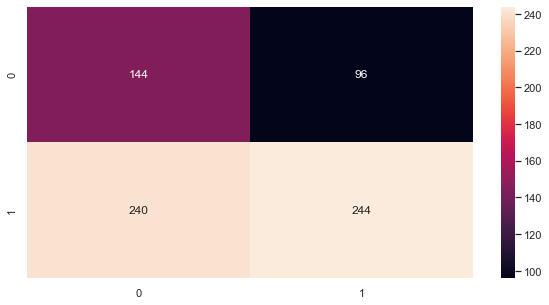

In [174]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import confusion_matrix , accuracy_score#train
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_train, train_predictions), annot=True, fmt='g')
print(classification_report(y_train, train_predictions))

              precision    recall  f1-score   support

           0       0.29      0.79      0.42       110
           1       0.72      0.22      0.34       273

    accuracy                           0.38       383
   macro avg       0.51      0.51      0.38       383
weighted avg       0.60      0.38      0.36       383



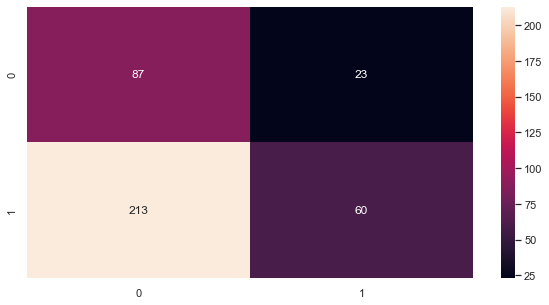

In [175]:
##test
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g')
print(classification_report(y_test, test_predictions))

In [178]:
####Column Ensemble + TimeSeriesForestClassifier + BossEsemble
##Esta combinación mejora los resultados de la clasificación
#####################################
from sktime.classification.compose import ColumnEnsembleClassifier
from sktime.classification.dictionary_based import BOSSEnsemble
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.transformations.panel.compose import ColumnConcatenator
#######################################################
#######################################################
##Column-wise ensembling via ColumnEnsembleClassifier in which one classifier 
##is fitted for each time series column and their predictions aggregated
###############################
clf = ColumnEnsembleClassifier(
    estimators=[
        ("TSF0", TimeSeriesForestClassifier(n_estimators=100), [0]),
        ("BOSSEnsemble3", BOSSEnsemble(max_ensemble_size=50), [3]),
    ]
)
###############################
clf.fit(X_train_nested, y_train)

ColumnEnsembleClassifier(estimators=[('TSF0',
                                      TimeSeriesForestClassifier(n_estimators=100),
                                      [0]),
                                     ('BOSSEnsemble3',
                                      BOSSEnsemble(max_ensemble_size=50),
                                      [3])])

In [179]:
train_predictions = clf.predict(X_train_nested)
accuracy_train = accuracy_score(y_train, train_predictions)
print(f"Accuracy train : %.2f%%" % (accuracy_train * 100.0))

Accuracy train : 100.00%


In [180]:
test_predictions = clf.predict(X_test_nested)
accuracy_test = accuracy_score(y_test, test_predictions)
print(f"Accuracy test : %.2f%%" % (accuracy_test * 100.0))

Accuracy test : 93.21%


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       240
           1       1.00      1.00      1.00       484

    accuracy                           1.00       724
   macro avg       1.00      1.00      1.00       724
weighted avg       1.00      1.00      1.00       724



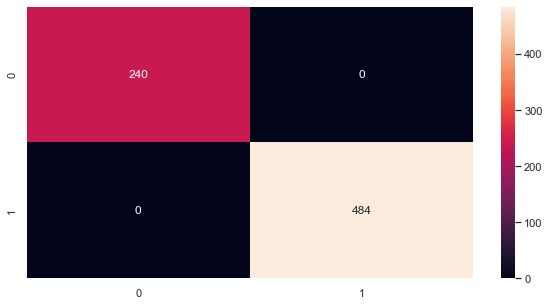

In [181]:
#train
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_train, train_predictions), annot=True, fmt='g')
print(classification_report(y_train, train_predictions))

              precision    recall  f1-score   support

           0       0.93      0.83      0.87       110
           1       0.93      0.97      0.95       273

    accuracy                           0.93       383
   macro avg       0.93      0.90      0.91       383
weighted avg       0.93      0.93      0.93       383



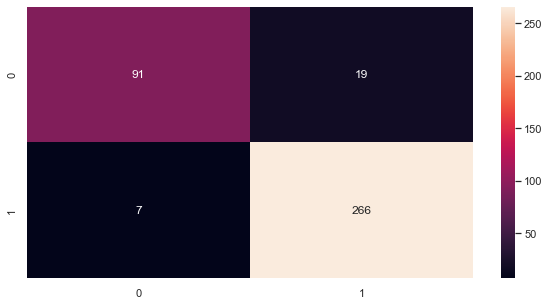

In [182]:
##test
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g')
print(classification_report(y_test, test_predictions))

In [185]:
###################
#####KNeighborsTimeSeriesClassifier
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
classifier = KNeighborsTimeSeriesClassifier()
classifier.fit(X_train_nested, y_train)
##KNeighborsTimeSeriesClassifier(...)

KNeighborsTimeSeriesClassifier()

In [186]:
test_predictions = classifier.predict(X_test_nested)
accuracy_test = accuracy_score(y_test, test_predictions)
print(f"Accuracy test : %.2f%%" % (accuracy_test * 100.0))

Accuracy test : 80.68%


              precision    recall  f1-score   support

           0       0.62      0.86      0.72       110
           1       0.93      0.78      0.85       273

    accuracy                           0.81       383
   macro avg       0.78      0.82      0.79       383
weighted avg       0.84      0.81      0.81       383



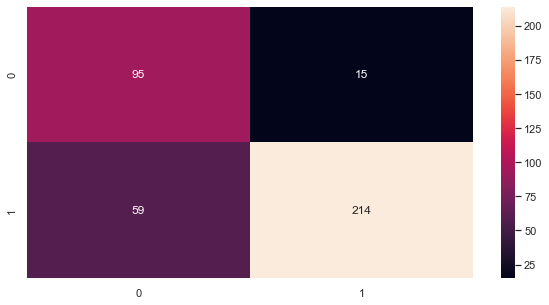

In [187]:
##test
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g')
print(classification_report(y_test, test_predictions))

Dado que se trata de un conjunto de datos con la clase desbalanceada, no serían fiables los datos de accuracy a nivel global y por esta razón se complementa  conel análisis de la matrix de confusión, los datos de accuracy por clase, la métrica recall y F1- score.

Se observa que para el train, hay overfitting y se corregiría al analizar con el conjunto test.

Algunas opciones a considerar para mejorar los resultados:
-Tratar la clase desbalanceada previamente generando de otra forma el train/test o buscar algún clasificador que pemirta indicar al modelo que está desbalanceado
-Probar otros algoritmos, incluso con aquellos que permitan trabajar con series de tiempo de diferente duración.
-Probar otra ventana de tiempo al generar nuevas variables, probar otro lag.
-Probar con otra combinación de variables e hiperparámetros
-Analizar con un conjunto de datos de validación los resultados obtenidos.

In [ ]:
##no funciona, hay que revisar pq indica que hay NAs o valores muy grandes!
###Concatenación de columnas + TimeSeriesForestClasiffier
##Concatenation of time series columns into a single long time series column via ColumnConcatenator
##and apply a classifier to the concatenated data,
####
#A time series forest (TSF) classifier adapts the random forest classifier to series data.
#1.	Split the series into random intervals, with random start positions and random lengths.
#2.	Extract summary features (mean, standard deviation, and slope) from each interval into a single feature vector.
#3.	Train a decision tree on the extracted features.
#4.	Repeat steps 1–3 until the required number of trees have been built or time runs out.
#New series are classified according to a majority vote of all the trees in the forest. (In a majority vote, the prediction is the class that is predicted by the most trees is the prediction of the forest).
###
####################################
##pipeline = Pipeline([("concatenate", ColumnConcatenator()),
  ##  ("classify", TimeSeriesForestClassifier(n_estimators=100))])
# import Grid Search class
#from sklearn.model_selection import GridSearchCV
# make lists of different parameters to check
#parameters = {
 # 'n_estimators':[10,50,100,200],
  #'min_samples_split': [7,14,21,45]
  #}
# initialize
#grid_pipeline = GridSearchCV(pipeline,parameters)
## fit
#grid_pipeline.fit(X_train,y_train)
#grid_pipeline.best_params_

##con GridSearch
# make lists of different parameters to check
#parameters = {
 # 'n_estimators':[1,10,100,1000],
  #'min_interval': [7,14,21]
  #}
# initialize
#rf = TimeSeriesForestClassifier()
#gd = GridSearchCV(rf,parameters)
# fit
#gd.fit(X_train_nested,y_train)
#gd.best_params_

#gd.score(X_test_nested, y_test)

In [ ]:
#train_predictions = gd.predict(X_train_nested)
#accuracy_train = accuracy_score(y_train, train_predictions)
#print(f"Accuracy train : %.2f%%" % (accuracy_train * 100.0))
###############################
#test_predictions = gd.predict(X_test_nested)
#accuracy_test = accuracy_score(y_test, test_predictions)
#print(f"Accuracy test : %.2f%%" % (accuracy_test * 100.0))
###############################
##train
#sns.heatmap(confusion_matrix(y_train, train_predictions), annot=True, fmt='g')
#print(classification_report(y_train, train_predictions))
##############################
##test
#fig, ax = plt.subplots(figsize=(15, 5))
#sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g')
#print(classification_report(y_test, test_predictions))

In [159]:
##Links útiles
##https://www.sktime.org/en/v0.8.2/index.html
##https://medium.com/swlh/using-sktime-for-time-series-classification-part-2-b07bb6b56d5
##http://learningsys.org/neurips19/assets/papers/sktime_ml_systems_neurips2019.pdf
##https://towardsdatascience.com/time-series-classification-with-deep-learning-d238f0147d6f
##https://towardsdatascience.com/multiple-time-series-classification-by-using-continuous-wavelet-transformation-d29df97c0442
##https://towardsdatascience.com/a-brief-introduction-to-time-series-classification-algorithms-7b4284d31b97